## This notebook is for the breaking statistics computation during revision of the JFM paper 
It uses the kernel of Stats.
* First we show that for the two Gaussian cases, their statistics AT LATER TIMES are similar to that of realistic ocean waves.
* Then we show that the slope based criterion is still valid for the Gaussian case

In [84]:
""" Two case with Gaussian spectrum """
config_set_Gaussian = [config_re1_1, config_re1_2] 

In [71]:
""" The wave field statistics as a function of time """
N = 1024; L = 200; dx = L/N

times = [0,20,40,60,80,100,120,140,160]
times = np.array(times)

for config in (config_set[:1]):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            sigma1_list = []
            sigma2_list = []
            sigma_list = []
            Hs_list = []
            for i in range (0, len(times)):
                t = times[i] 
                eta = case.read_t(fieldname='eta', t=t)  
                ddx = np.gradient(eta, axis=1)/dx
                ddy = np.gradient(eta, axis=0)/dx
                sigma1 = np.var(ddx)**0.5
                sigma2 = np.var(ddy)**0.5
                sigma1_list.append(sigma1)
                sigma2_list.append(sigma2)
                kmod, Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=1024)
                mu = steepness_trunc (Fkmod, kmod)
                sigma_list.append(mu[-1])
                Hs_list.append(4*np.std(eta)**0.5)
                                
            case.sigma1_list = np.array(sigma1_list)
            case.sigma2_list = np.array(sigma2_list)
            case.sigma_list = np.array(sigma_list)
            case.sigma_grad_list = (case.sigma1_list**2+case.sigma2_list**2)**0.5
            case.kpHs_list = np.array(Hs_list)*case.config.kp


N=1024, L=200
N=1024, L=200
N=1024, L=200
N=1024, L=200
N=1024, L=200
N=1024, L=200
N=1024, L=200
N=1024, L=200
N=1024, L=200


/tmp/ipykernel_261633/2748138845.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ', table_headers = ['t', 'ke', 'gpe'])
/tmp/ipykernel_261633/1091702561.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/multiple_sigmas_wiith_energy.pdf', bbox_inches='tight', pad_inche=0.)


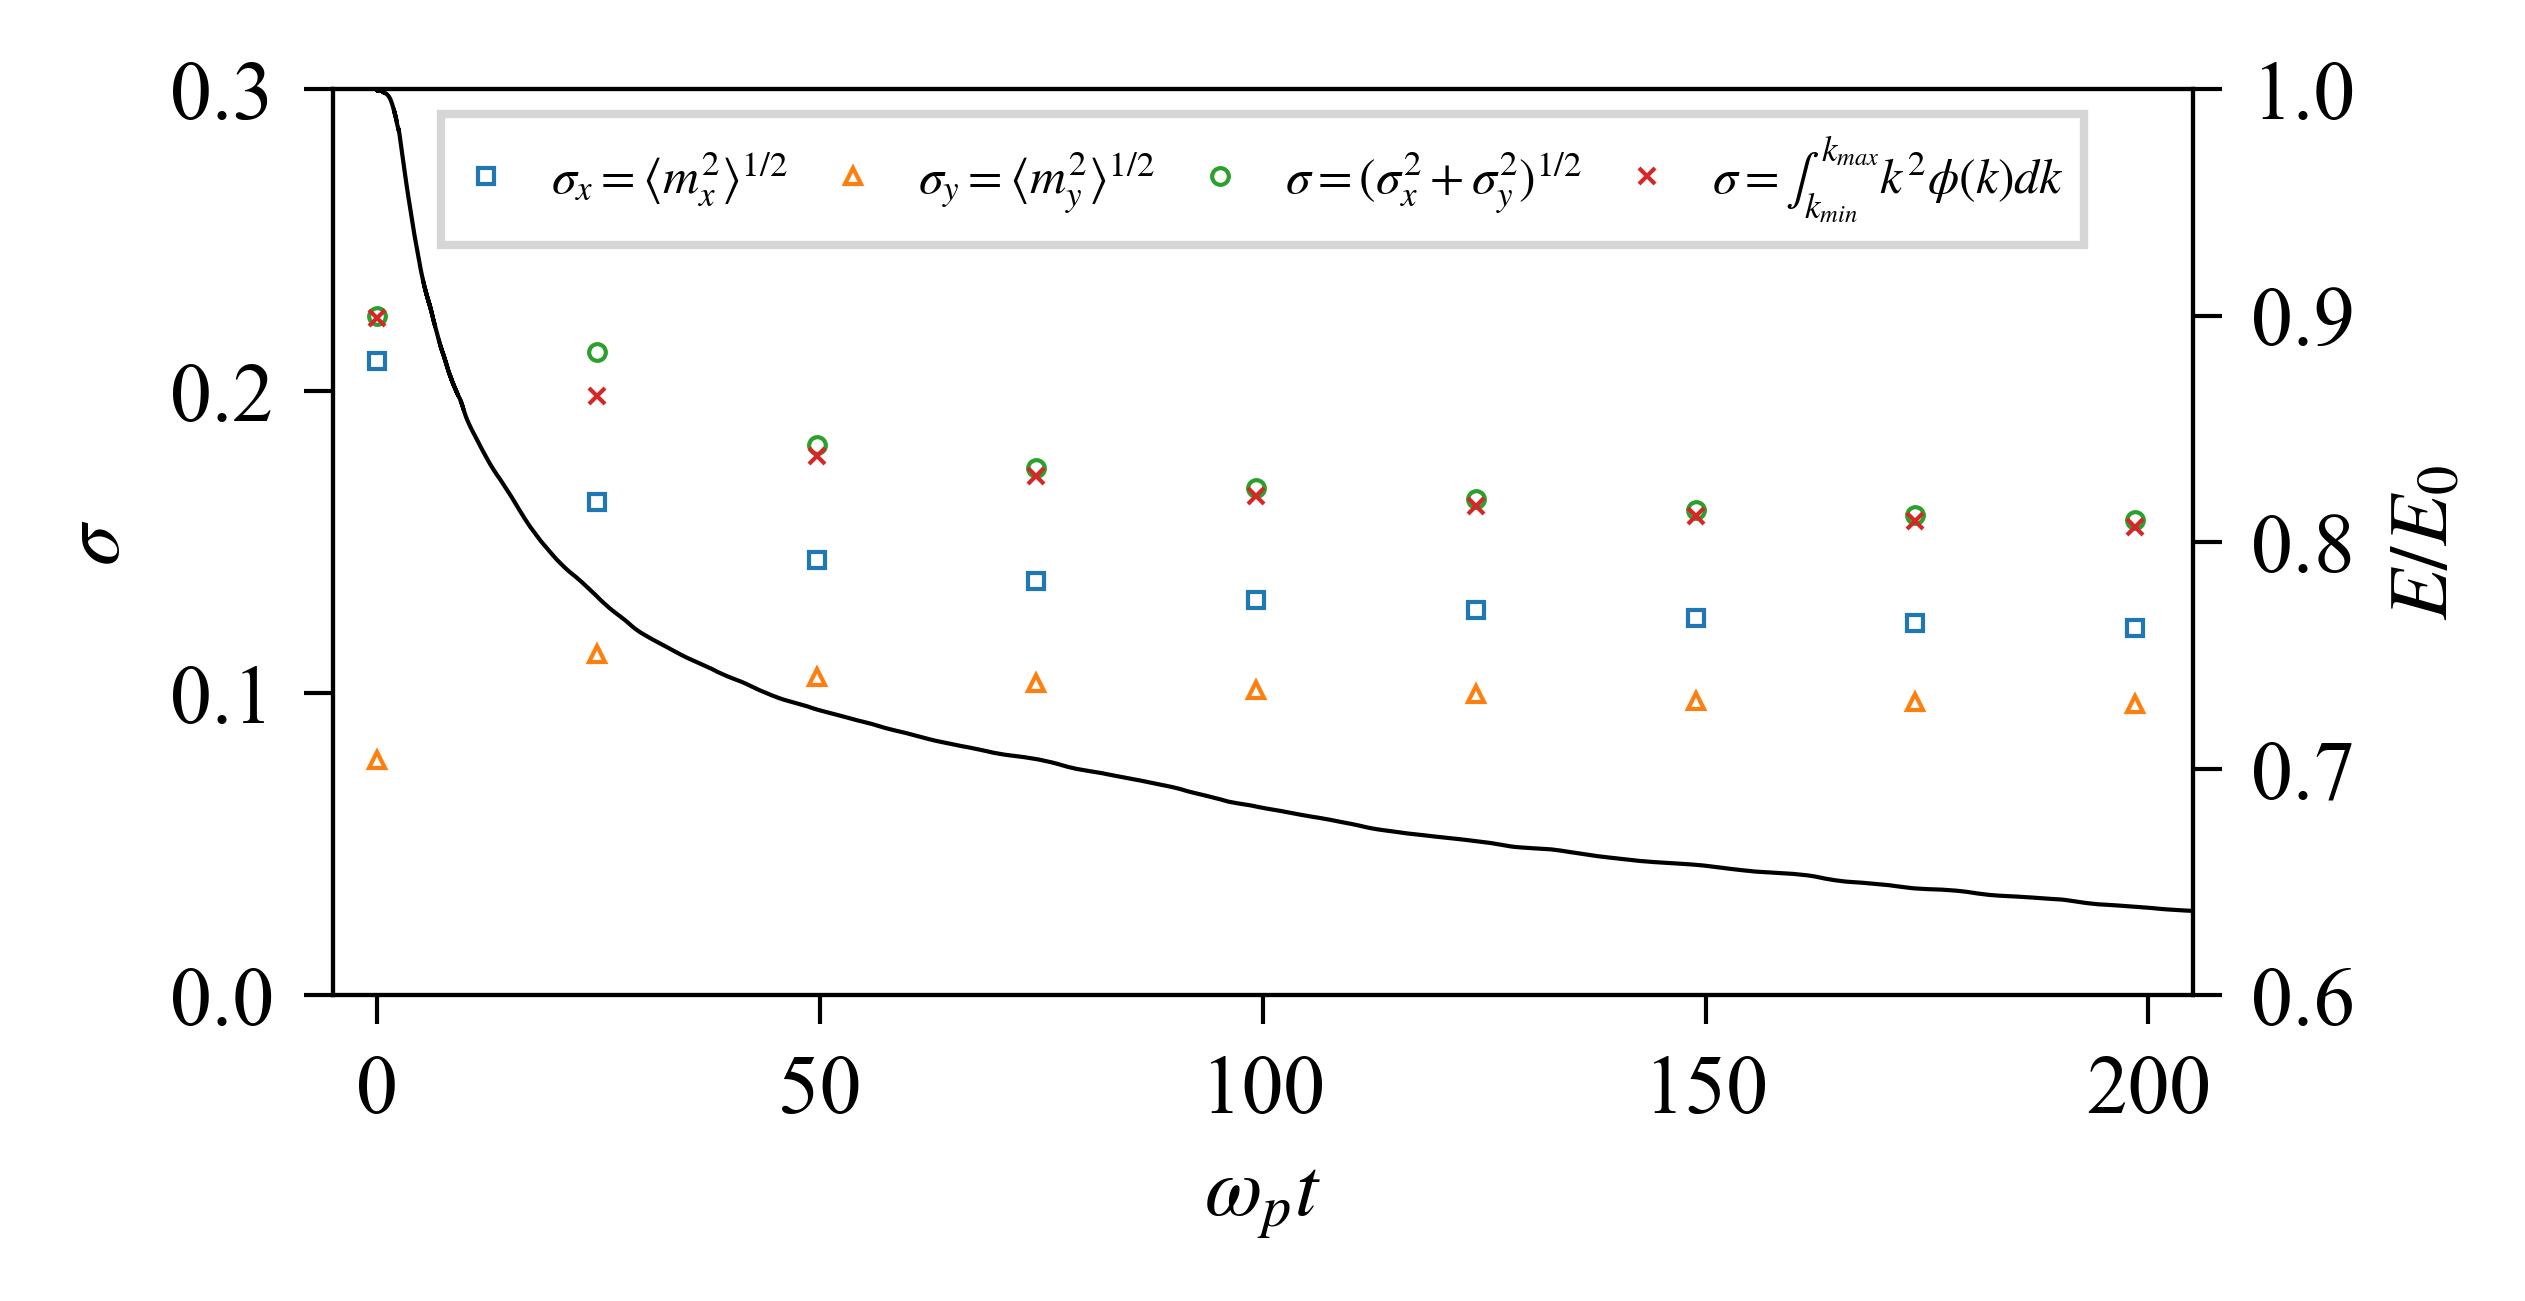

In [90]:
fig = plt.figure(figsize=[4,2]); ax=plt.gca()
plt.plot(times*omegap, case.sigma1_list, 's', lw=1, ms=2, markerfacecolor="None", markeredgewidth=0.5, label=r'$\sigma_x = \langle m_x^2 \rangle ^{1/2}$')
plt.plot(times*omegap, case.sigma2_list, '^', lw=1, ms=2, markerfacecolor="None", markeredgewidth=0.5, label=r'$\sigma_y = \langle m_y^2 \rangle ^{1/2}$')
plt.plot(times*omegap, case.sigma_list, 'o', lw=1, ms=2, markerfacecolor="None", markeredgewidth=0.5, label=r'$\sigma = (\sigma_x^2+\sigma_y^2)^{1/2}$')
plt.plot(times*omegap, case.sigma_grad_list, 'x', lw=1, ms=2, markerfacecolor="None", markeredgewidth=0.5, label=r'$\sigma = \int_{k_{min}}^{k_{max}}k^2\phi(k)dk$')
plt.xlabel(r'$\omega_p t$'); plt.xlim([-5,205])
plt.ylabel(r'$\sigma$'); plt.ylim([0,0.3])
plt.legend(fancybox=False, handlelength=1, fontsize=6, ncol=4, loc='upper center', columnspacing=0.8)

ax2 = ax.twinx()
path = case.path
energy = read(path, 'energy_before_remap.dat')
ax2.plot(energy.t*omegap, energy.total/energy.total[0],'-', label=r'$E/E_0$', lw=0.5, c='k')
ax2.set_ylim([0.6,1.0]); ax2.set_ylabel(r'$E/E_0$')

fig.savefig('figures_revision/multiple_sigmas_wiith_energy.pdf', bbox_inches='tight', pad_inche=0.)

/tmp/ipykernel_261633/3482337617.py:30: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/Field_c40_c40_elevation.pdf', bbox_inches='tight', pad_inche=0.)


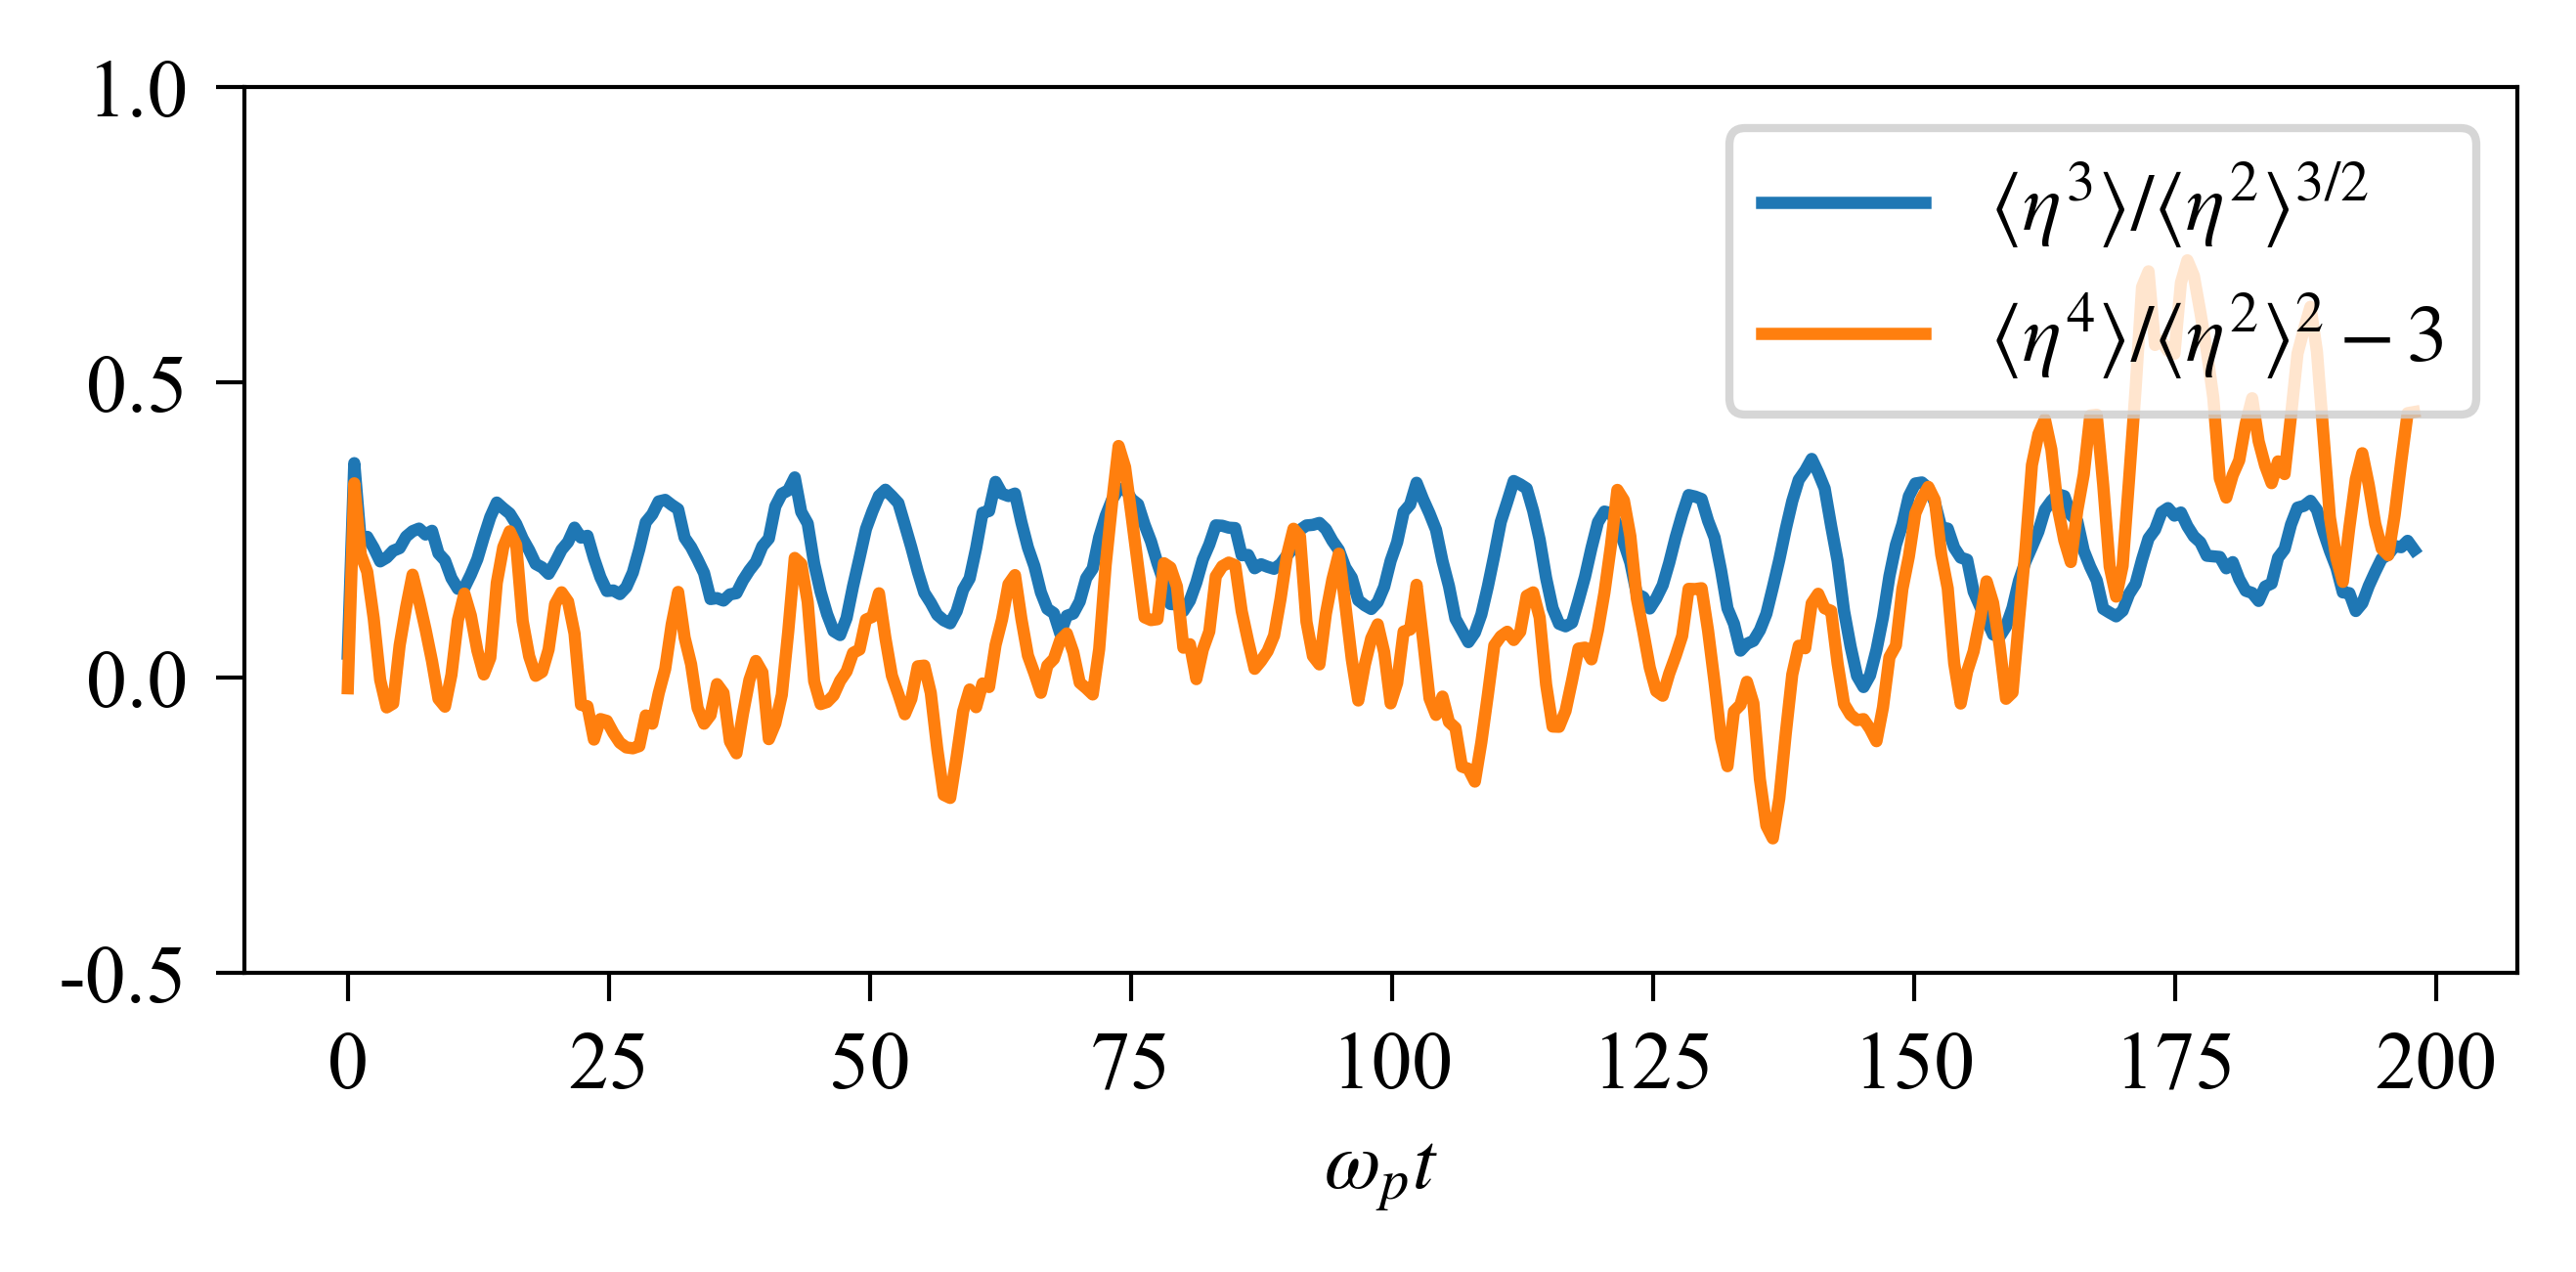

In [122]:
""" Higher frequency sampling and plot kurtosis and skewness of ELEVATION """
times = np.array(times)
times = np.arange(0, 160, 0.5)

config = config_re1_1 # Gaussian 
config = config2_2 # Regular

# for case in config.cases:
#     if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
#         skewness_list = []
#         kurtosis_list = []
#         for i in range (0, len(times)):
#             t = times[i] 
#             eta = case.read_t(fieldname='eta', t=t)  
#             eta = eta - np.average(eta)
#             skewness = np.average(eta**3)/np.var(eta)**1.5; skewness_list.append(skewness)
#             kurtosis = np.average(eta**4)/np.var(eta)**2 - 3; kurtosis_list.append(kurtosis)

#         case.skewness_list = np.array(skewness_list)
#         case.kurtosis_list = np.array(kurtosis_list)

fig = plt.figure(figsize=[5,2]); ax=plt.gca()
for case in config.cases:
    if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
        plt.plot(times*omegap, case.skewness_list, label=r'$\langle \eta^3 \rangle/\langle \eta^2 \rangle^{3/2}$')
        plt.plot(times*omegap, case.kurtosis_list, label=r'$\langle \eta^4 \rangle/\langle \eta^2 \rangle^2 - 3$')
        plt.ylim([-0.5,1])
        plt.legend(loc='upper right')
        plt.xlabel('$\omega_p t$')
        fig.savefig('figures_revision/Field_c40_c40_elevation.pdf', bbox_inches='tight', pad_inche=0.)

/tmp/ipykernel_261633/1586564561.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/Field_c40_c40_gradient.pdf', bbox_inches='tight', pad_inche=0.)


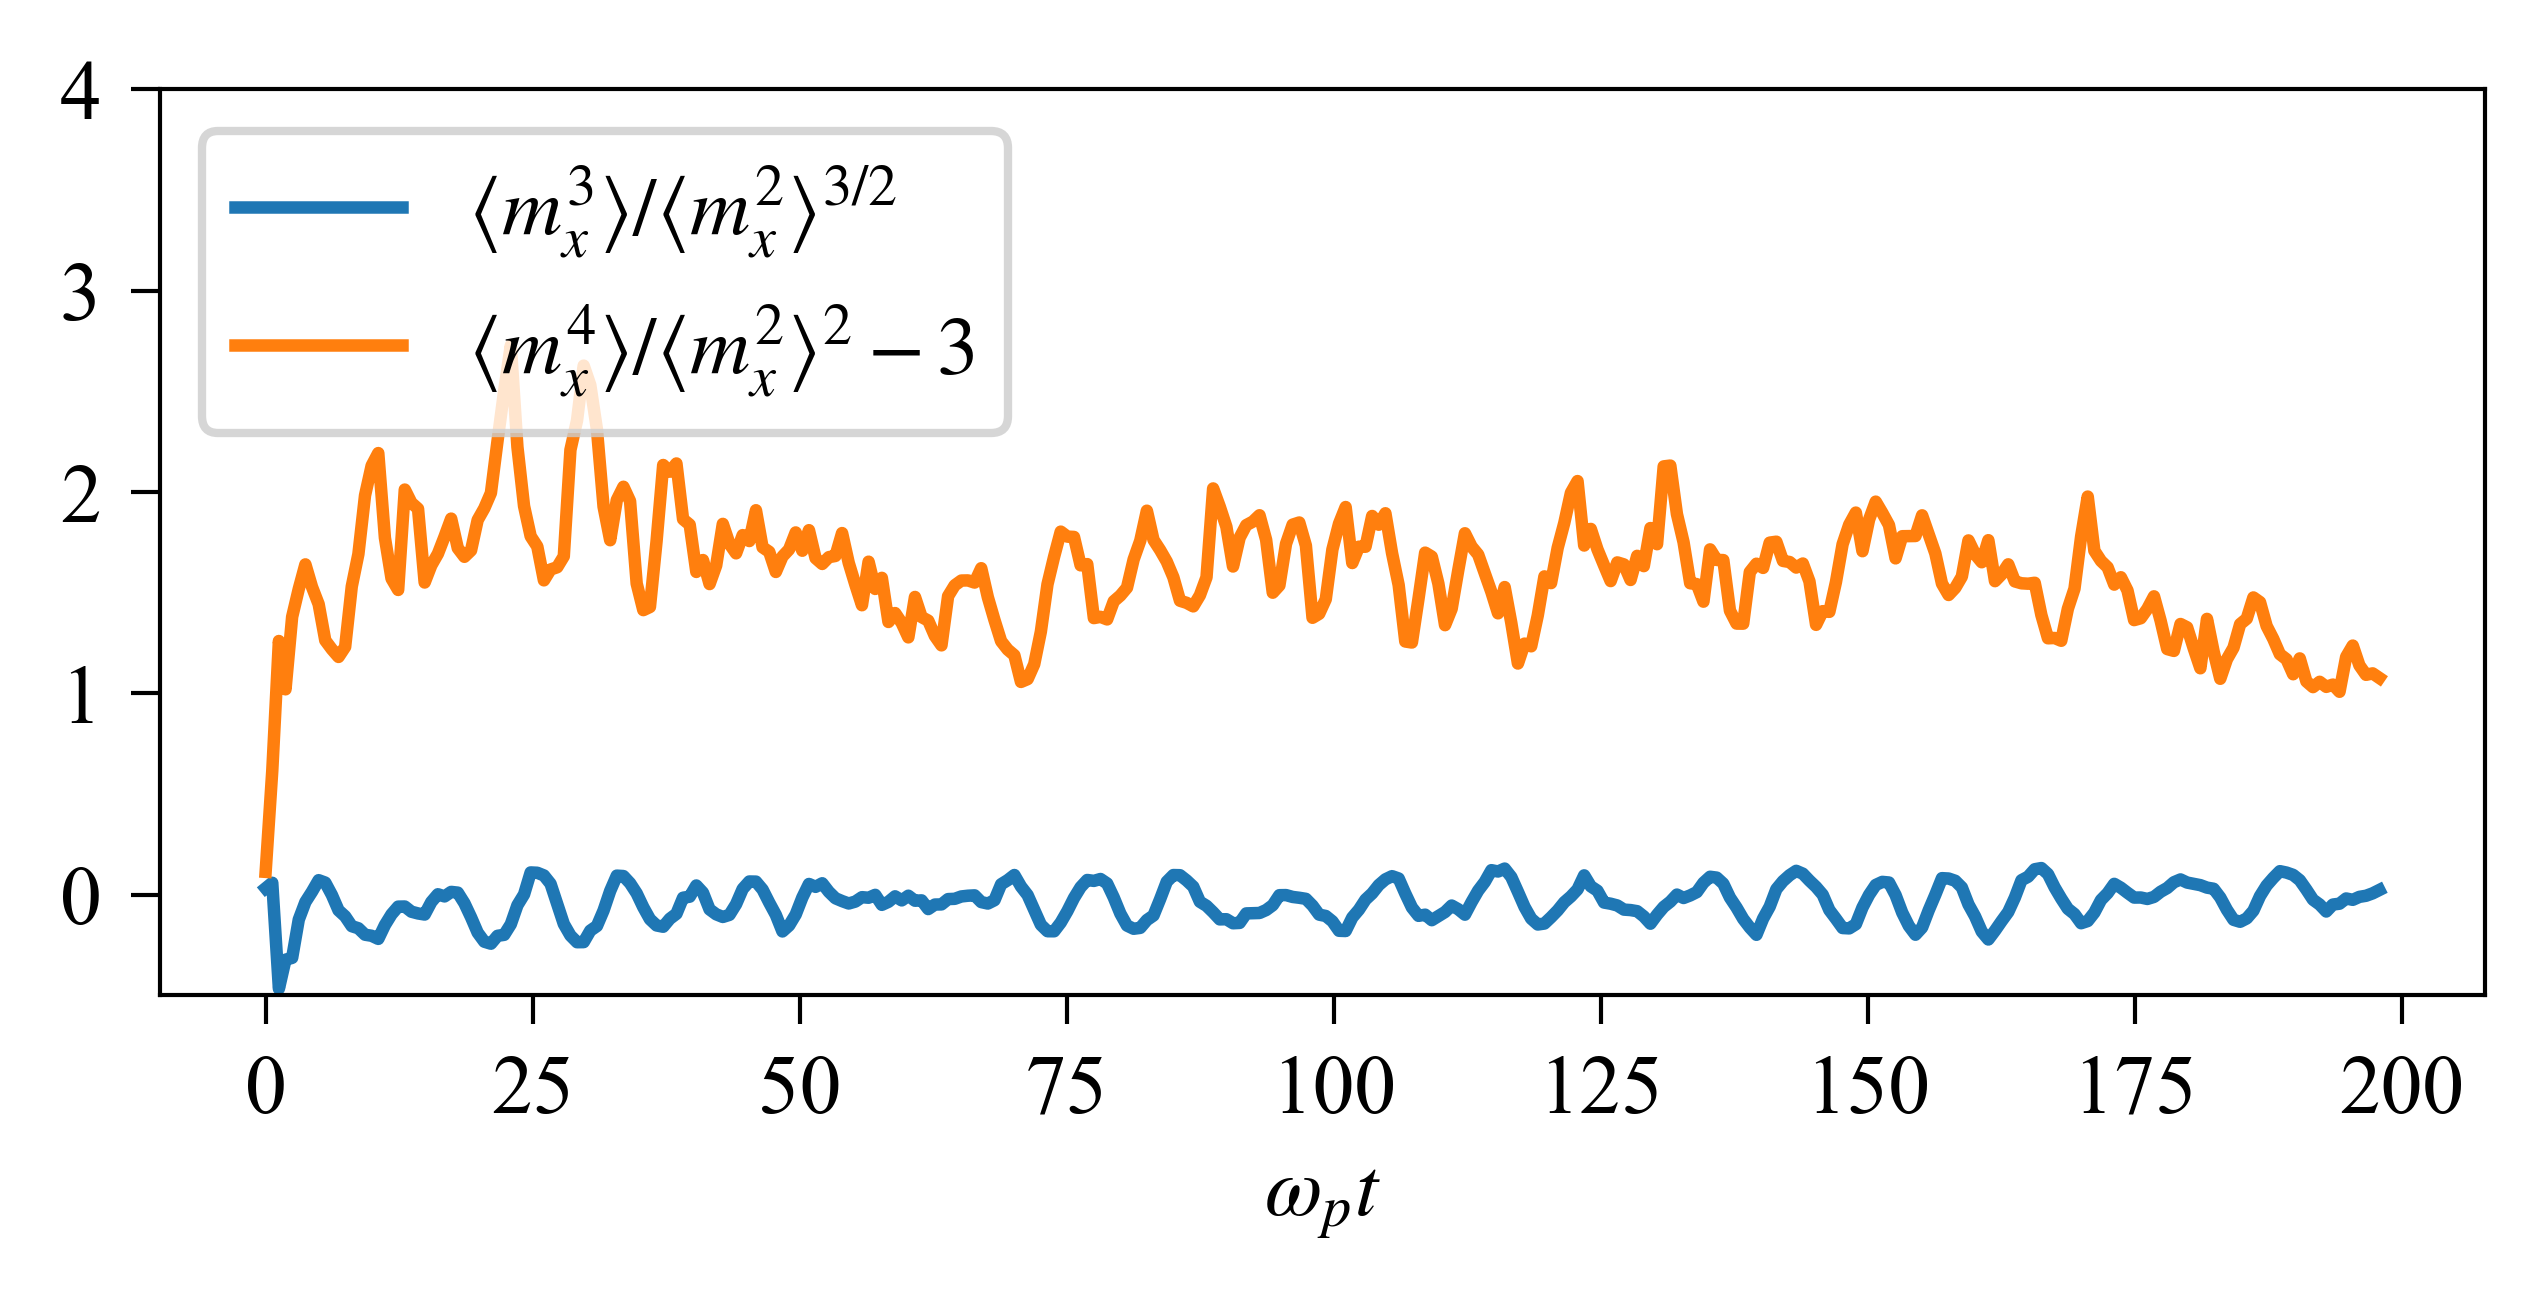

In [120]:
""" Higher frequency sampling and plot kurtosis and skewness of GRADIENT """
times = np.array(times)
times = np.arange(0, 160, 0.5)
N = 1024; L = 200; dx = L/N

config = config_re1_1 # Gaussian 
config = config2_2 # Regular

# for case in config.cases:
#     if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
#         skewness2_list = []
#         kurtosis2_list = []
#         for i in range (0, len(times)):
#             t = times[i] 
#             eta = case.read_t(fieldname='eta', t=t)  
#             eta = eta - np.average(eta)
#             ddx = np.gradient(eta, axis=1)/dx
#             skewness = np.average(ddx**3)/np.var(ddx)**1.5; skewness2_list.append(skewness)
#             kurtosis = np.average(ddx**4)/np.var(ddx)**2 - 3; kurtosis2_list.append(kurtosis)

#         case.skewness2_list = np.array(skewness2_list)
#         case.kurtosis2_list = np.array(kurtosis2_list)

fig = plt.figure(figsize=[5,2]); ax=plt.gca()
for case in config.cases:
    if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
        plt.plot(times*omegap, case.skewness2_list, label=r'$\langle m_x^3 \rangle/\langle m_x^2 \rangle^{3/2}$')
        plt.plot(times*omegap, case.kurtosis2_list, label=r'$\langle m_x^4 \rangle/\langle m_x^2 \rangle^2 - 3$')
        plt.ylim([-0.5,4])
        plt.legend(loc='upper left')
        plt.xlabel(r'$\omega_p t$')
        fig.savefig('figures_revision/Field_c40_c40_gradient.pdf', bbox_inches='tight', pad_inche=0.)

In [25]:
''' Compute the time dependent breaking statistics ''' 
tseries_ensem = []
for i in range (0,4):
    tstart = 90 + i*20
    dt = 0.2
    tseries = np.arange(tstart, tstart+20, dt)
    tseries_ensem.append(tseries)

for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            case.time_window(tseries_ensem, threshold=0, bins=[])

In [11]:
for i, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            print(case.path)
            case.cc = plt.cm.get_cmap('Oranges')((case.Hskp-0.05)/0.35)

/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_GaussianG0.15S0.5_RE40000_10_15_rand2_Htheta0.503_new/
/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_GaussianG0.15S0.8_RE40000_10_15_rand2_Htheta0.503_new/


c_max = 6.67558


/tmp/ipykernel_164983/4060877897.py:66: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/Gaussian1_energy_forpaper.pdf', bbox_inches='tight', pad_inche=0.)


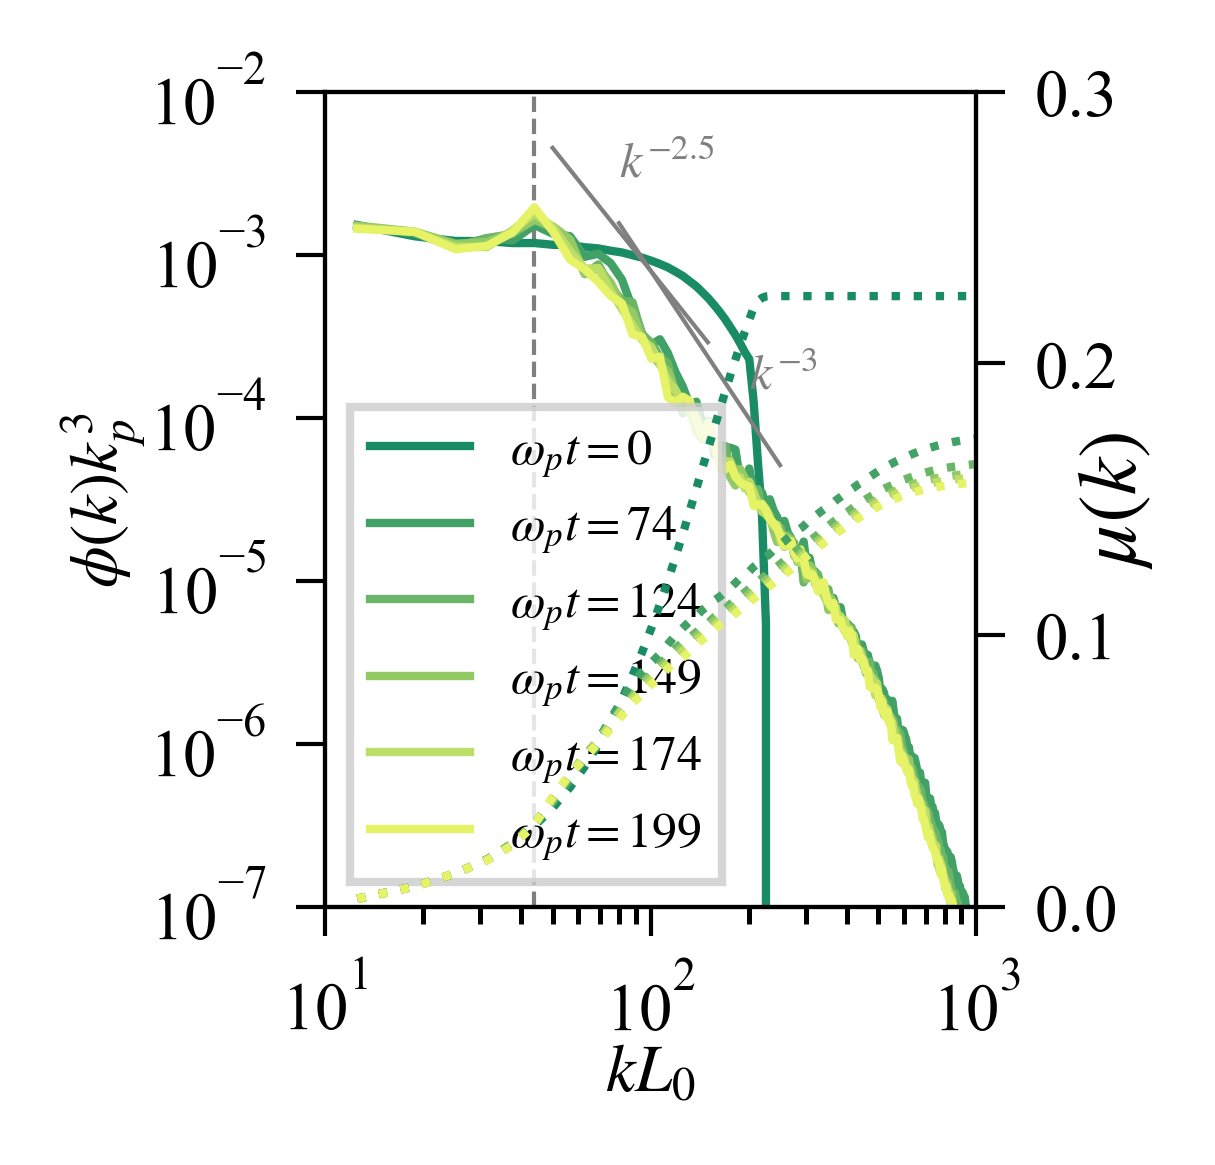

In [196]:
""" Time varying spectrum, for the paper """
fig = plt.figure(figsize = [1.4,1.8]); ax = plt.gca()
ax2 = ax.twinx()

# Limit of resolution
N = 1024; L = 200; kp = 2*np.pi/(L/5); omegap = (9.8*kp)**0.5
k_m = 2*np.pi/(L/N*4)

times = [0,60,100,120,140,160]
colors = [plt.get_cmap('summer')(x) for x in np.linspace(0.1,0.9,len(times))]
config = config_re1_1

# for case in config.cases:
#     if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand == 2):
#         case.mu_ensem = []
#         case.Hskp_ensem = []
#         case.Fkmod_ensem = []
#         for i in range (0,len(times)):
#             t = times[i]
#             eta = case.read_t(fieldname='eta', t=t)  
#             case.kmod, Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
#             mu = steepness_trunc (Fkmod, case.kmod)
#             case.mu_ensem.append(mu)
#             Hskp = np.var(eta)**0.5*4*case.config.kp
#             case.Hskp_ensem.append(Hskp)
#             config.kmod = case.kmod
#             case.Fkmod_ensem.append(Fkmod)
#             print('t=%g, sigma=%g, kpHs=%g' %(t, mu[-1], Hskp))

for case in config.cases:
    if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand == 2):       
        imax = np.argmax(case.Fkmod_ensem[-1]) 
        case.cp_spec = (9.8/case.kmod[imax])**0.5
        ax.axvline(case.kmod[imax]*case.config.L0,ls='--',color='C7',lw=0.5)
        print('c_max = %g' %case.cp_spec)
        for i in range (0,len(times)):           
            t = times[i]
            ax.plot(case.kmod[2:]*config.L0, case.Fkmod_ensem[i][2:]*config.kp**3, lw=1, 
                    label='$\omega_p t=%.0f$' %(t*omegap), c=colors[i])
            ax2.plot(case.kmod[2:]*config.L0, case.mu_ensem[i][2:], ':', lw=1, c=colors[i])
                    
ax.plot(np.arange(50,150,0.05), np.arange(50,150,0.05)**(-2.5)*80, lw=0.5, c='gray')
ax.text(80, 0.003, '$k^{-2.5}$', c='gray', fontsize=6)
ax.plot(np.arange(80,250,0.05), np.arange(80,250,0.05)**(-3.)*800, lw=0.5, c='gray')
ax.text(200, 0.00015, '$k^{-3}$', c='gray', fontsize=6)

ax.set_ylabel('$\phi(k)k_p^3$', labelpad=0, fontsize=8)
ax.set_xlabel('$kL_0$', labelpad=0, fontsize=8)
ax2.set_ylabel('$\mu(k)$', labelpad=-5)
# ax2.axhline(0.1,ls='--',color='C7',lw=0.5)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax.legend(loc='lower left', fancybox=False, bbox_to_anchor=(1.4, 0.2), handlelength=0.8)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim([10,k_m*L])
ax.set_xlim([10,1000])
ax.set_ylim([10**(-7.),10**(-2.)])
ax2.set_ylim([0,0.3])
ax.set_yticks([10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2)])
ax2.set_yticks([0, 0.1, 0.2, 0.3])
ax.legend(fancybox=False, loc='lower left', fontsize=6)
ax.xaxis.set_tick_params(labelsize=8); ax.yaxis.set_tick_params(labelsize=8); ax2.yaxis.set_tick_params(labelsize=8)

fig.savefig('figures_revision/Gaussian1_energy_forpaper.pdf', bbox_inches='tight', pad_inche=0.)

/tmp/ipykernel_164983/2748138845.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ', table_headers = ['t', 'ke', 'gpe'])
/tmp/ipykernel_164983/61436540.py:65: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/Gaussian_energy_forpaper.pdf', bbox_inches='tight', pad_inche=0.)


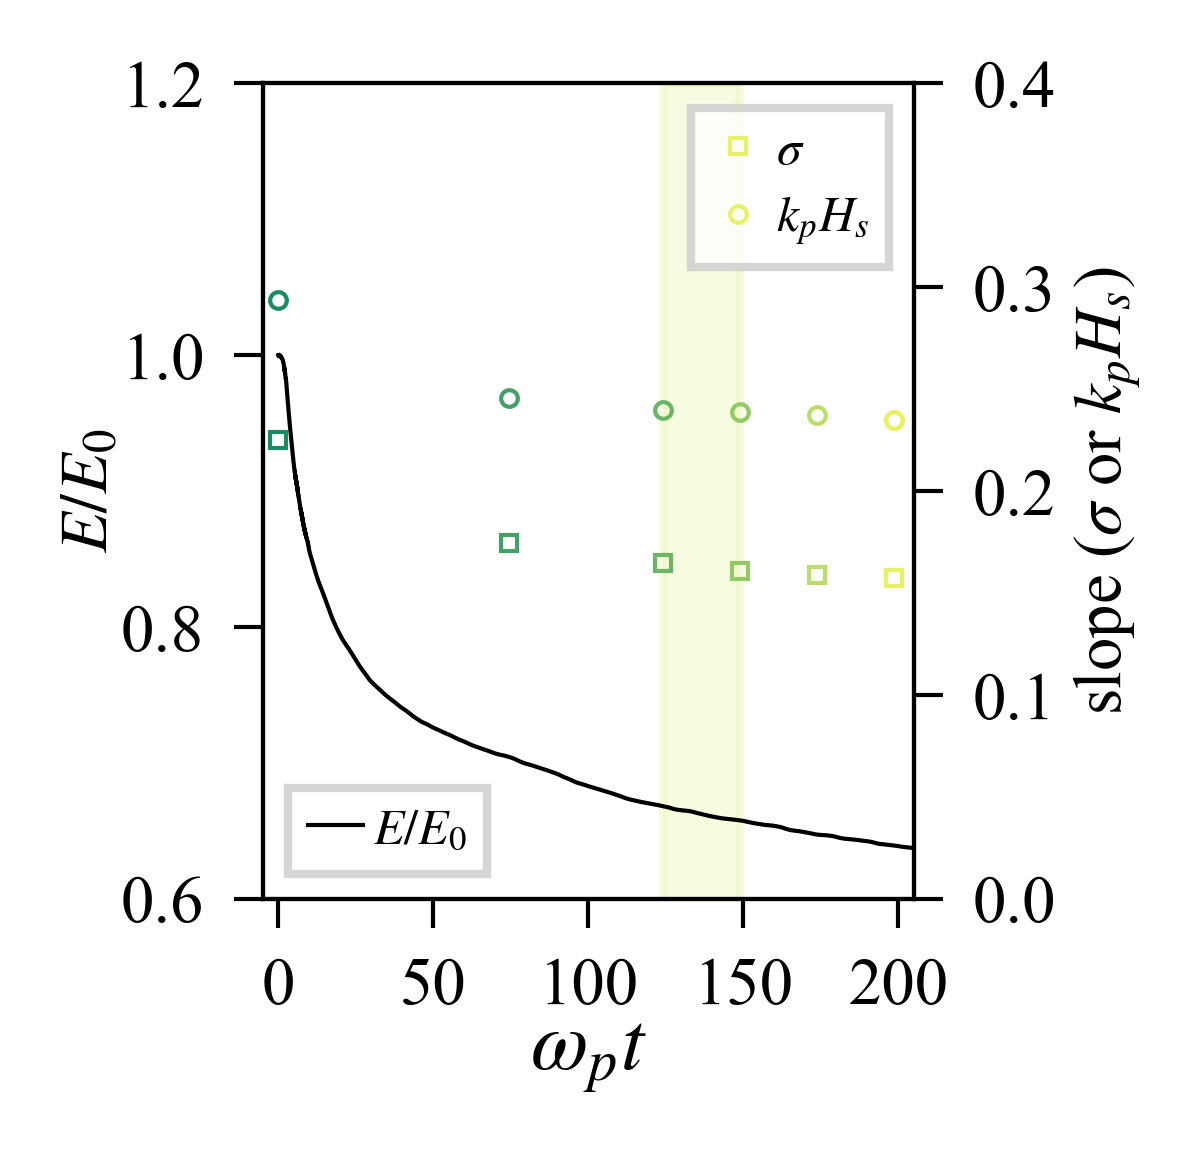

In [192]:
fig = plt.figure(figsize=[1.4,1.8]); ax = fig.gca(); ax2 = ax.twinx()
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5

times = [0,60,100,120,140,160]
colors = [plt.get_cmap('summer')(x) for x in np.linspace(0.1,0.9,len(times))]
config = config_re1_1

path = config.cases[0].path
energy = read(path, 'energy_before_remap.dat')
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', label=r'$E/E_0$', lw=0.5, c='k')
# ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0], '--', lw=0.5, c='C0')
# ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', lw=0.5, c='C0')

""" Time dependent spectrum """
# for case in config.cases:
#     if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1) and (case.rand == 2):
#         case.mu_ensem = []
#         case.Hskp_ensem = []
#         case.Fkmod_ensem = []
#         for i in range (0,len(times)):
#             t = times[i]
#             eta = case.read_t(fieldname='eta', t=t)  
#             case.kmod, Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
#             mu = steepness_trunc (Fkmod, case.kmod)
#             case.mu_ensem.append(mu)
#             Hskp = np.var(eta)**0.5*4*case.config.kp
#             case.Hskp_ensem.append(Hskp)
#             config.kmod = case.kmod
#             case.Fkmod_ensem.append(Fkmod)
#             print('t=%g, sigma=%g, kpHs=%g' %(t, mu[-1], Hskp))
                
for case in config.cases:
    if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1) and (case.rand == 2):
        eta = case.read_t(fieldname='eta', t=0)
        eta_var0 = np.var(eta)
        for i in range (0,len(times)):
            t = times[i] 
            eta = case.read_t(fieldname='eta', t=t)  
            ax2.plot(t*omegap, case.mu_ensem[i][-1], 's', lw=1, c=colors[i], ms=2, markerfacecolor="None", markeredgewidth=0.5)
            ax2.plot(t*omegap, 4*np.var(eta)**0.5*kp, 'o', lw=1, c=colors[i], ms=2, markerfacecolor="None", markeredgewidth=0.5)

        ax2.plot(t*omegap, case.mu_ensem[i][-1], 's', lw=1, c=colors[i], ms=2, markerfacecolor="None", markeredgewidth=0.5,
                 label=r'$\sigma$')
        ax2.plot(t*omegap, 4*np.var(eta)**0.5*kp, 'o', lw=1, c=colors[i], ms=2, markerfacecolor="None", markeredgewidth=0.5, 
                 label=r'$k_pH_s$')


ax.set_ylim([0.6,1.2])
ax.set_xlim([-5,205])
x = np.arange(100,121,1)*omegap
ax.fill_between(x, 0.4, 1.2, alpha=0.2, color=plt.cm.get_cmap('summer')(3/3.5))
ax.set_xticks([0, 50, 100, 150, 200])
ax.set_yticks([0.6,0.8,1.0,1.2])
ax2.set_ylim([0,0.4])
ax2.set_ylabel('slope ($\sigma$ or $k_pH_s$)', labelpad=2, fontsize=8)
ax2.set_yticks([0,0.1,0.2,0.3,0.4])
ax2.tick_params(axis='both', labelsize=8)
ax.legend(fancybox=False, fontsize=6, handlelength=1.1, labelspacing=0.4, handletextpad=0.2, loc='lower left')
ax2.legend(fancybox=False, fontsize=6, handlelength=1.1, labelspacing=0.4, handletextpad=0.2, loc = 'upper right')
ax.set_xlabel(r'$\omega_p t$', labelpad=0)
ax.set_ylabel(r'$E/E_0$', labelpad=0, fontsize=8)
ax.tick_params(which='both', labelsize=8)
fig.savefig('figures_revision/Gaussian_energy_forpaper.pdf', bbox_inches='tight', pad_inche=0.)

/tmp/ipykernel_164983/1598234071.py:63: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/Gaussian1_time_aver_forpaper.pdf', bbox_inches='tight', pad_inche=0.)


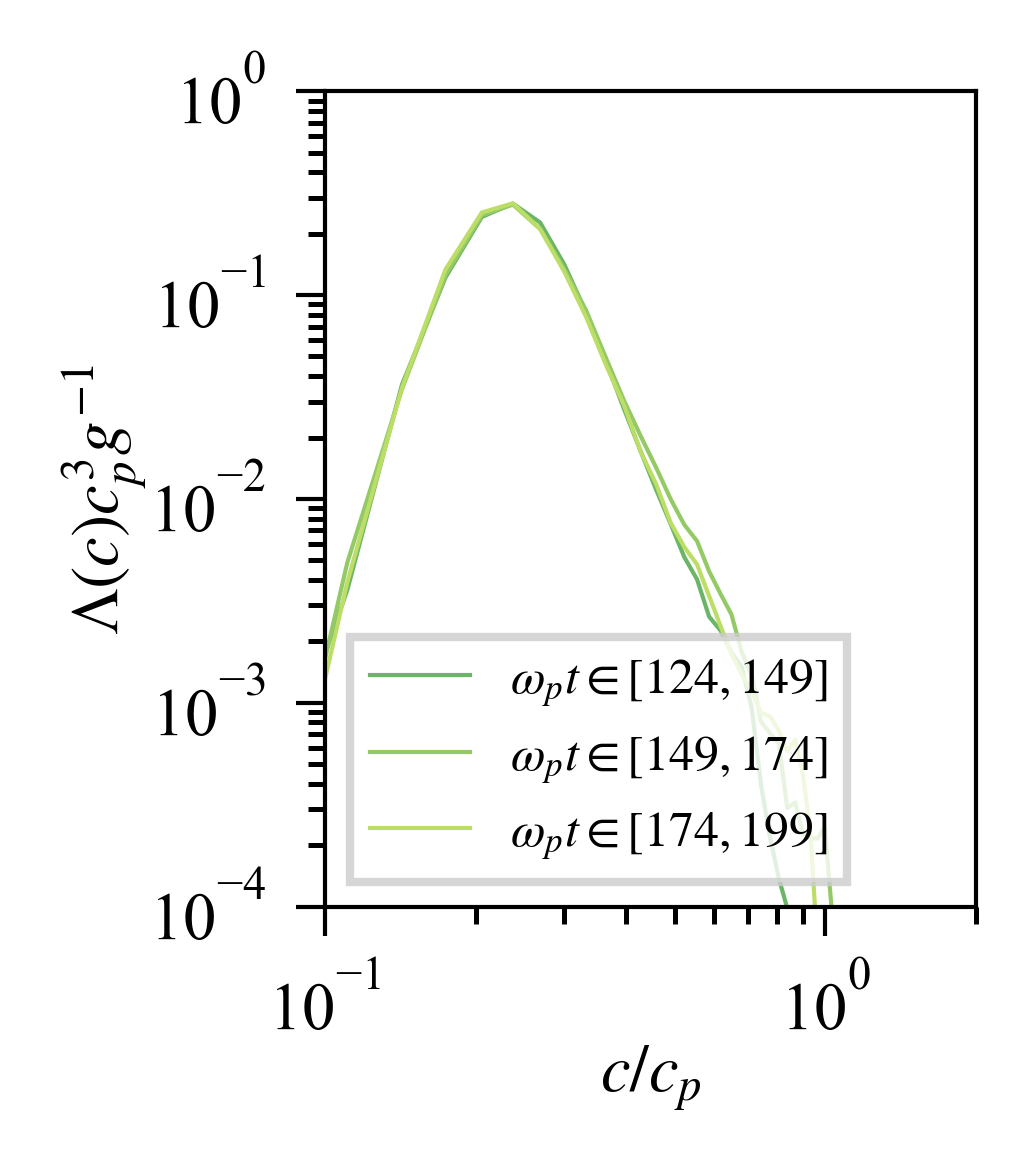

In [195]:
""" Normalized Lambda(x) distribution. """
fig = plt.figure(figsize=[1.4,1.8]); ax = plt.gca()

kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5

times = [0,60,100,120,140,160]
colors = [plt.get_cmap('summer')(x) for x in np.linspace(0.1,0.9,len(times))]
config = config_re1_1

''' Compute the time dependent breaking statistics ''' 
tseries_ensem = []
for i in range (0,3):
    tstart = 100 + i*20
    dt = 0.2
    tseries = np.arange(tstart, tstart+20, dt)
    tseries_ensem.append(tseries)

# for case in config.cases:
#     if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
#         case.time_window(tseries_ensem, threshold=0, bins=[])

for j,case in enumerate(config.cases):
    normx = (9.8/config.kp)**0.5
    normy = 1/((9.8/config.kp)**1.5/9.8)
    if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
        bins = case.hist_ensem['bins']
        bins_plotting = bins[1:] - (bins[2] - bins[1])/2
        average = np.array(case.hist_ensem['hist_ensem'][0])*0
        for i,hist in enumerate(case.hist_ensem['hist_ensem']):
            if case.Htheta == 0.503:
                plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, c=colors[i+2], linestyle='-', 
                         alpha=1, lw=0.5, label=r'$\omega_p t\in[%.0f, %.0f]$' %(times[i+2]*omegap, times[i+3]*omegap))   

                    
plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

# x_ = np.linspace(0.5, 1.12, 100)
# y_ = x_**(-6)*0.008
# plt.plot(x_, y_, '--', c='gray', alpha=1, lw=1)
# ax.annotate(r'$\propto c^{-6}$', xy=(0.65, 0.8), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=10)

plt.xlim([0.1,2])
plt.ylim([10**(-4),10**(0)])
 
plt.xlabel(r'$c/c_p$', labelpad=0, fontsize=8)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0, fontsize=8)
# plt.xlabel(r'$c/((k_pH_s)^{1/2} c_p)$', labelpad=0) # equivalent to plt.xlabel(r'$c/\sqrt{gH_s}$', labelpad=0)
# plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}(k_pH_s)^{-1/2}$', labelpad=0) # equivalent to plt.ylabel(r'$\Lambda(c)\sqrt{gH_s}^3g^{-1}(k_pH_s)^4$', labelpad=0)


""" Normalized """
# x_ = np.linspace(0.2, 1, 100)
# y_ = x_**(-5)*0.00045
# plt.plot(x_, y_, '--', c='gray', alpha=1, lw=0.5)
# y_ = x_**(-6)*0.0002
# plt.plot(x_, y_, '--', c='gray', alpha=1, lw=0.5)
# ax.annotate(r'$\propto c^{-6}$', xy=(0.65, 0.55), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=10)
ax.tick_params(which='both', labelsize=8)
plt.legend(fancybox=False, loc='lower left', fontsize=6)
fig.savefig('figures_revision/Gaussian1_time_aver_forpaper.pdf', bbox_inches='tight', pad_inche=0.)


0.16442041564999021
0.16059055805358852
0.1589780548508293
0.1573920182710228
0.1603452617063577


/tmp/ipykernel_261633/919892161.py:47: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/Gaussian_time_aver_scaled.pdf', bbox_inches='tight', pad_inche=0.)


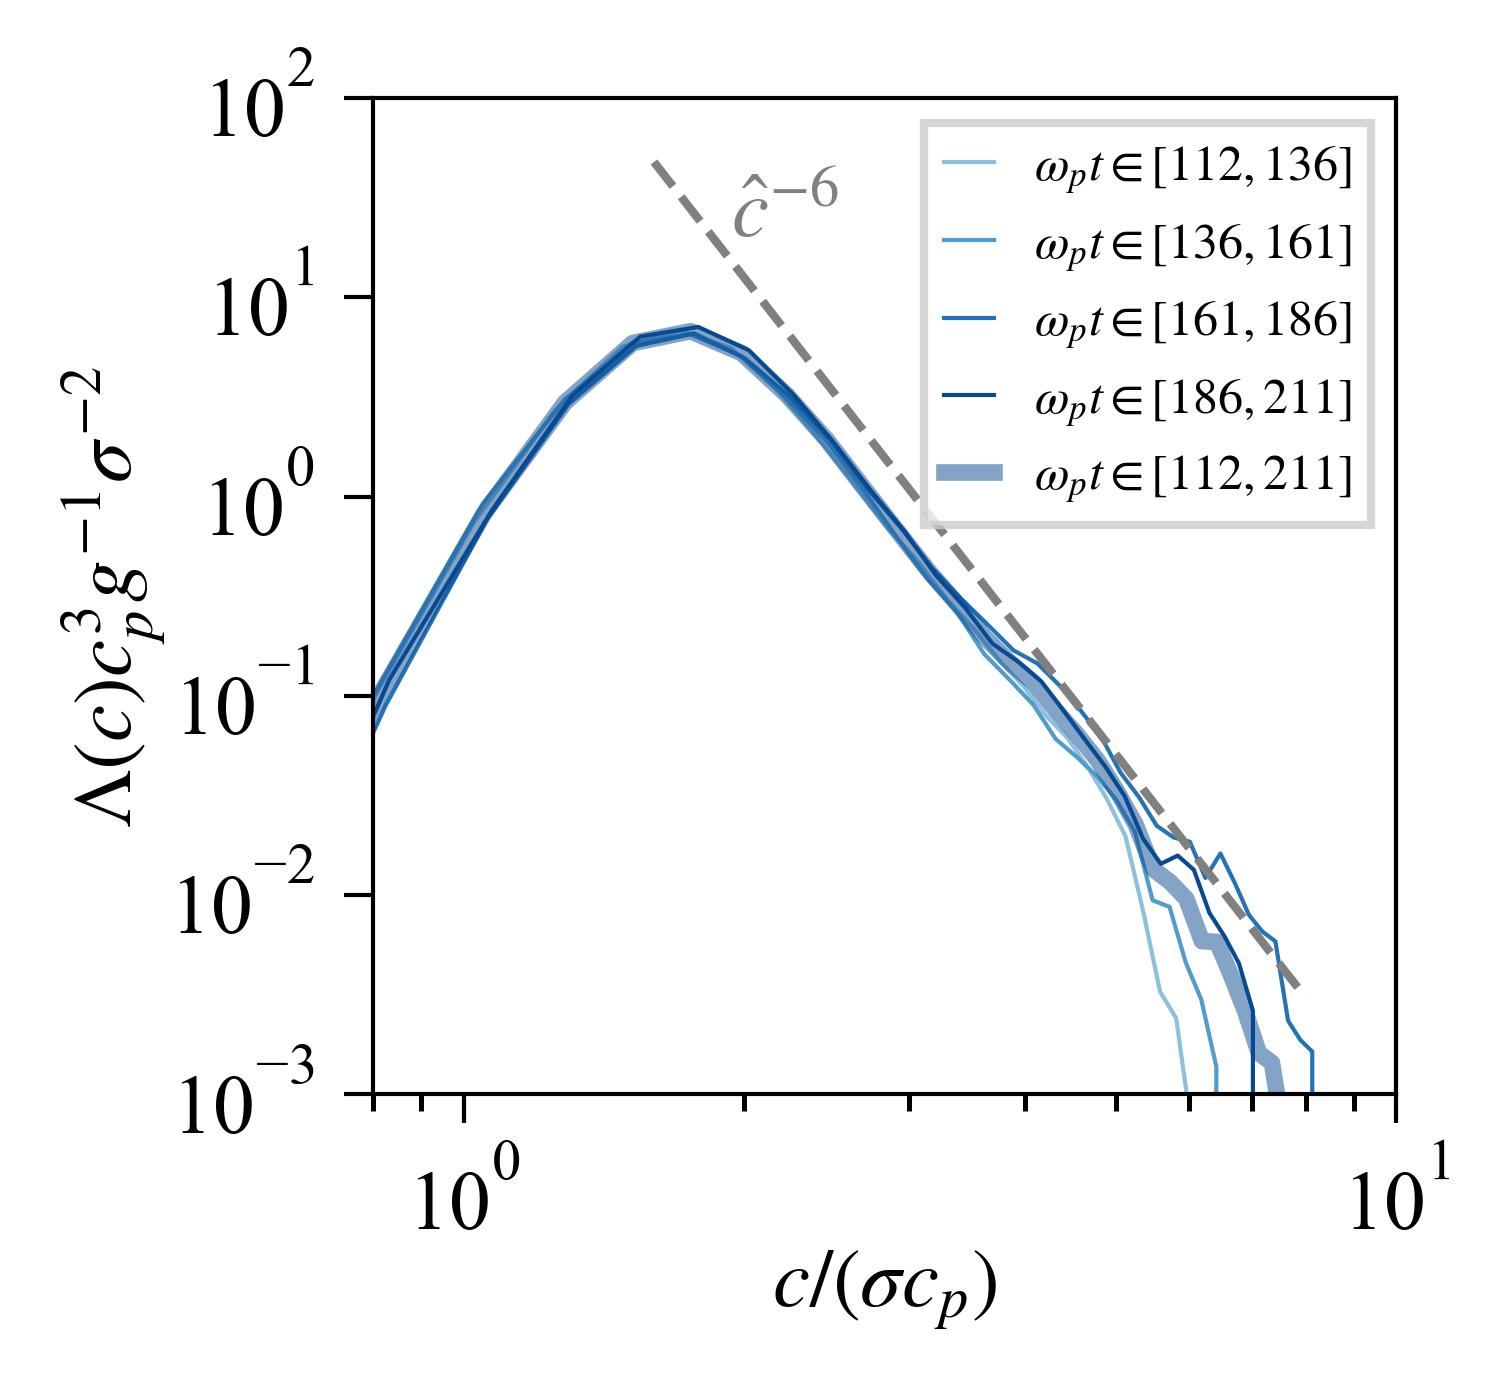

In [152]:

fig = plt.figure(figsize=[2.2,2.2]); ax = plt.gca()

for k, config in enumerate(config_set[:1]):
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            average = case.hist_ensem['hist_ensem'][0]*0
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                normx = case.cp_spec * case.mu_ensem[i+2][-1] ** 1 # The first two sigmas are not included
                normy = 1/(case.cp_spec**3/9.8) * case.mu_ensem[i+2][-1] ** 2
                print(case.mu_ensem[i+2][-1])
                average = average + np.array(hist)
                if k == 0:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                             label=r'$\omega_p t\in[%.0f, %.0f]$' %(times[i], times[i+1]), c=colors1[i+2], linestyle='-', alpha=1, lw=0.5)            # The extra filter 
            average = np.array(average)/len(case.hist_ensem['hist_ensem'])   
            if k == 0:
                mu_aver = np.average(case.mu_ensem[2:], axis=0)
                normx = case.cp_spec * mu_aver[-1] ** 1
                normy = 1/(case.cp_spec**3/9.8) * mu_aver[-1] ** 2
                print(mu_aver[-1])
                plt.plot(bins_plotting/normx, average/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=r'$\omega_p t\in[%.0f, %.0f]$' %(times[0], times[-1]), 
                         c=colors1[i+2], linestyle='-', alpha=0.5, lw=2) 
                    
plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.8,10])
plt.ylim([10**(-3),10**2])
 
plt.xlabel(r'$c/(\sigma c_p)$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}\sigma^{-2}$', labelpad=0)
ax.set_yticks([10**(-3), 10**(-2), 10**(-1), 10**(0), 10**(1), 10**2])
# plt.xlabel(r'$c/((k_pH_s)^{1/2} c_p)$', labelpad=0) # equivalent to plt.xlabel(r'$c/\sqrt{gH_s}$', labelpad=0)
# plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}(k_pH_s)^{-1/2}$', labelpad=0) # equivalent to plt.ylabel(r'$\Lambda(c)\sqrt{gH_s}^3g^{-1}(k_pH_s)^4$', labelpad=0)

""" Normalized """
x_ = np.linspace(1.6, 8, 100)
y_ = x_**(-6)*800
plt.plot(x_, y_, '--', c='gray', alpha=1, lw=1)
ax.annotate(r'$\hat{c}^{-6}$', xy=(0.35, 0.92), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=10)
plt.legend(fancybox=False, loc='upper right', fontsize=6, handlelength=1)

fig.savefig('figures_revision/Gaussian1_time_aver_scaled.pdf', bbox_inches='tight', pad_inche=0.)

c_max = 6.67558
c_max = 6.67558


/tmp/ipykernel_261633/2616255966.py:50: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/Gaussian1_spectrum.pdf', bbox_inches='tight', pad_inche=0.)


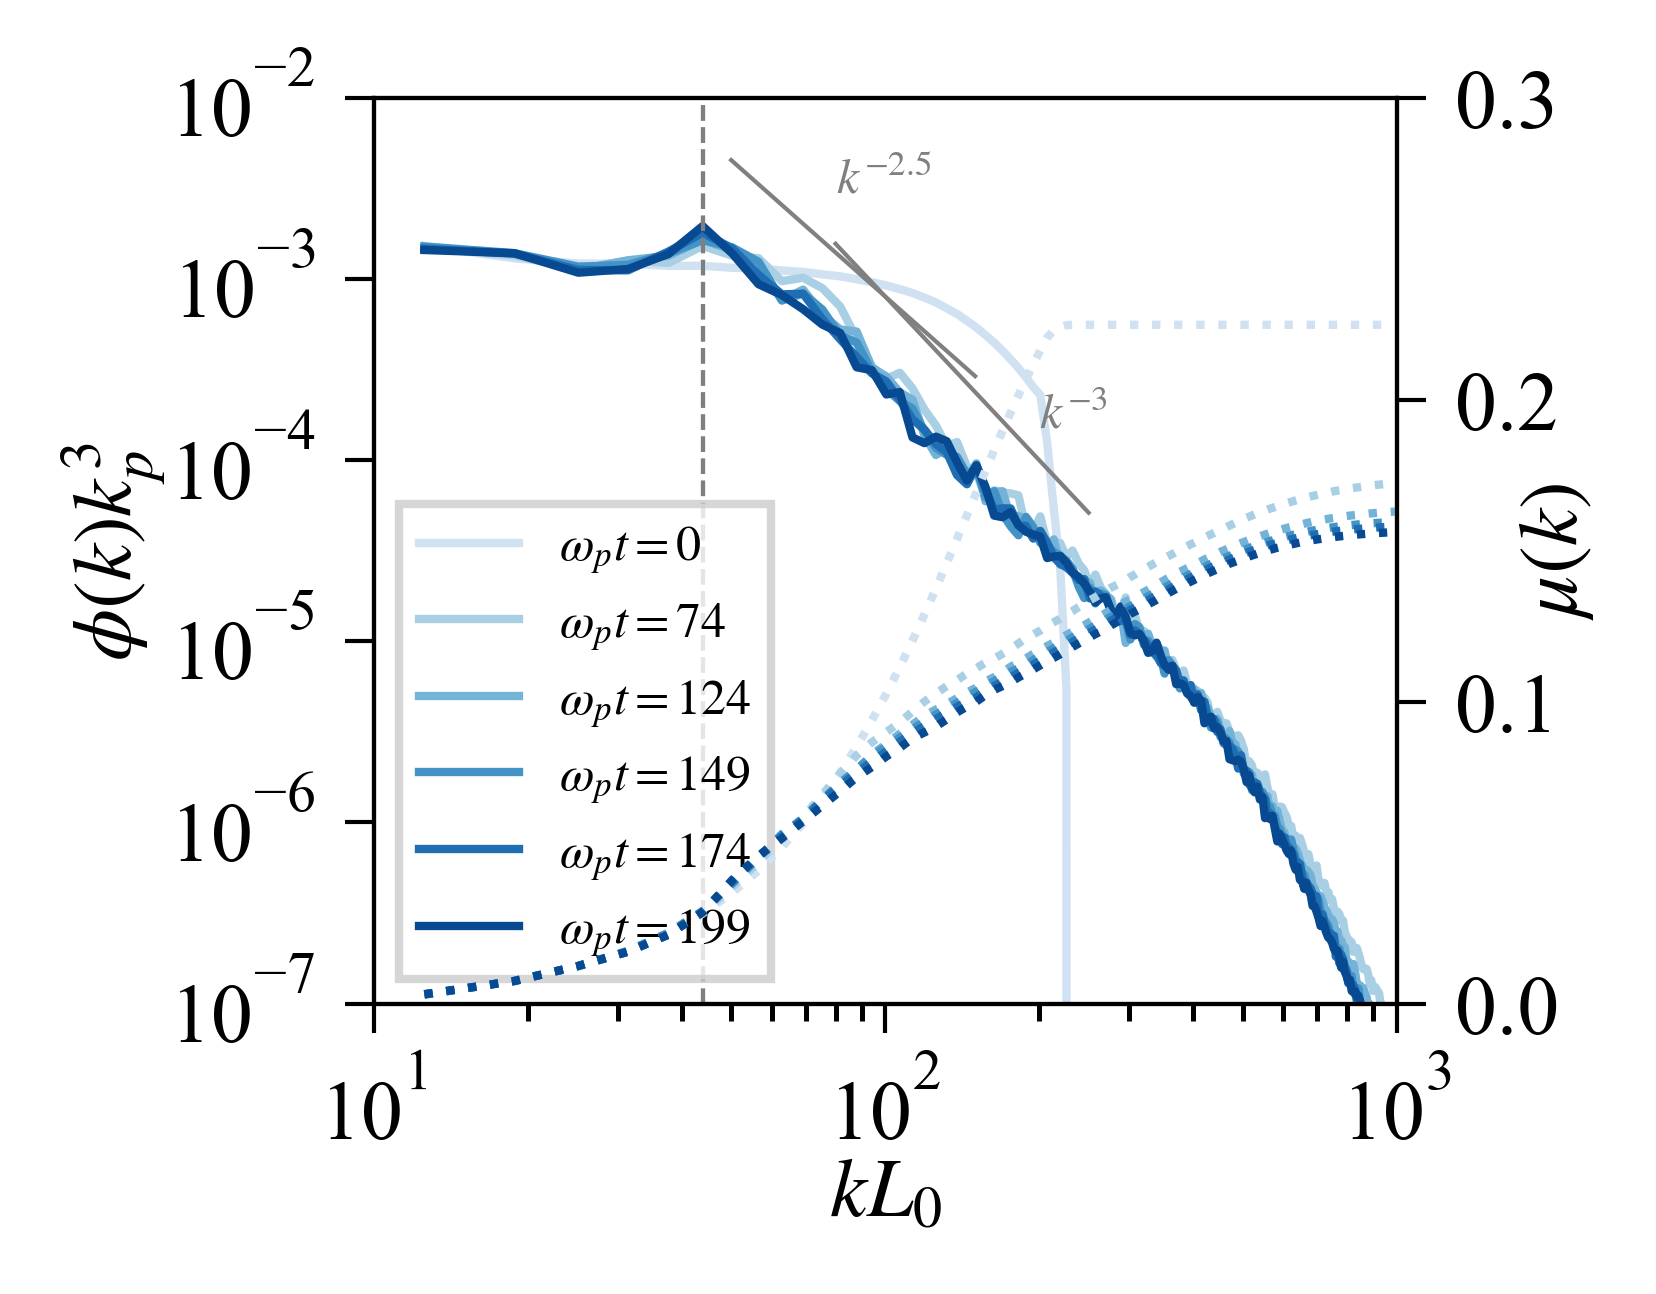

In [161]:
""" Time varying spectrum """
fig = plt.figure(figsize = [2.2,2]); ax = plt.gca()
ax2 = ax.twinx()

# Limit of resolution
N = 1024; L = 200; kp = 2*np.pi/(L/5); omegap = (9.8*kp)**0.5
k_m = 2*np.pi/(L/N*4)

nc = 6
colors1 = [plt.get_cmap('Blues')(x) for x in np.linspace(0.2,0.9,nc)]
colors2 = [plt.get_cmap('Greens')(x) for x in np.linspace(0.2,0.9,nc)]

times = [0,60,100,120,140,160]

for (k,config) in enumerate(config_set[0:2]):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):       
            imax = np.argmax(case.Fkmod_ensem[-1]) 
            case.cp_spec = (9.8/case.kmod[imax])**0.5
            ax.axvline(case.kmod[imax]*case.config.L0,ls='--',color='C7',lw=0.5)
            print('c_max = %g' %case.cp_spec)
            for i in range (0,nc):           
                t = times[i]
                if k ==0:
                    ax.plot(case.kmod[2:]*config.L0, case.Fkmod_ensem[i][2:]*config.kp**3, lw=1, 
                            label='$\omega_p t=%.0f$' %(t*omegap), c=colors1[i])
                    ax2.plot(case.kmod[2:]*config.L0, case.mu_ensem[i][2:], ':', lw=1, c=colors1[i])
                    
ax.plot(np.arange(50,150,0.05), np.arange(50,150,0.05)**(-2.5)*80, lw=0.5, c='gray')
ax.text(80, 0.003, '$k^{-2.5}$', c='gray', fontsize=6)
ax.plot(np.arange(80,250,0.05), np.arange(80,250,0.05)**(-3.)*800, lw=0.5, c='gray')
ax.text(200, 0.00015, '$k^{-3}$', c='gray', fontsize=6)

ax.set_ylabel('$\phi(k)k_p^3$', labelpad=0)
ax.set_xlabel('$kL_0$', labelpad=0)
ax2.set_ylabel('$\mu(k)$', labelpad=-5)
# ax2.axhline(0.1,ls='--',color='C7',lw=0.5)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax.legend(loc='lower left', fancybox=False, bbox_to_anchor=(1.4, 0.2), handlelength=0.8)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim([10,k_m*L])
ax.set_xlim([10,1000])
ax.set_ylim([10**(-7.),10**(-2.)])
ax2.set_ylim([0,0.3])
ax.set_yticks([10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2)])
ax.legend(fancybox=False, loc='lower left', fontsize=6)
fig.savefig('figures_revision/Gaussian1_spectrum.pdf', bbox_inches='tight', pad_inche=0.)

### Two Gaussians together

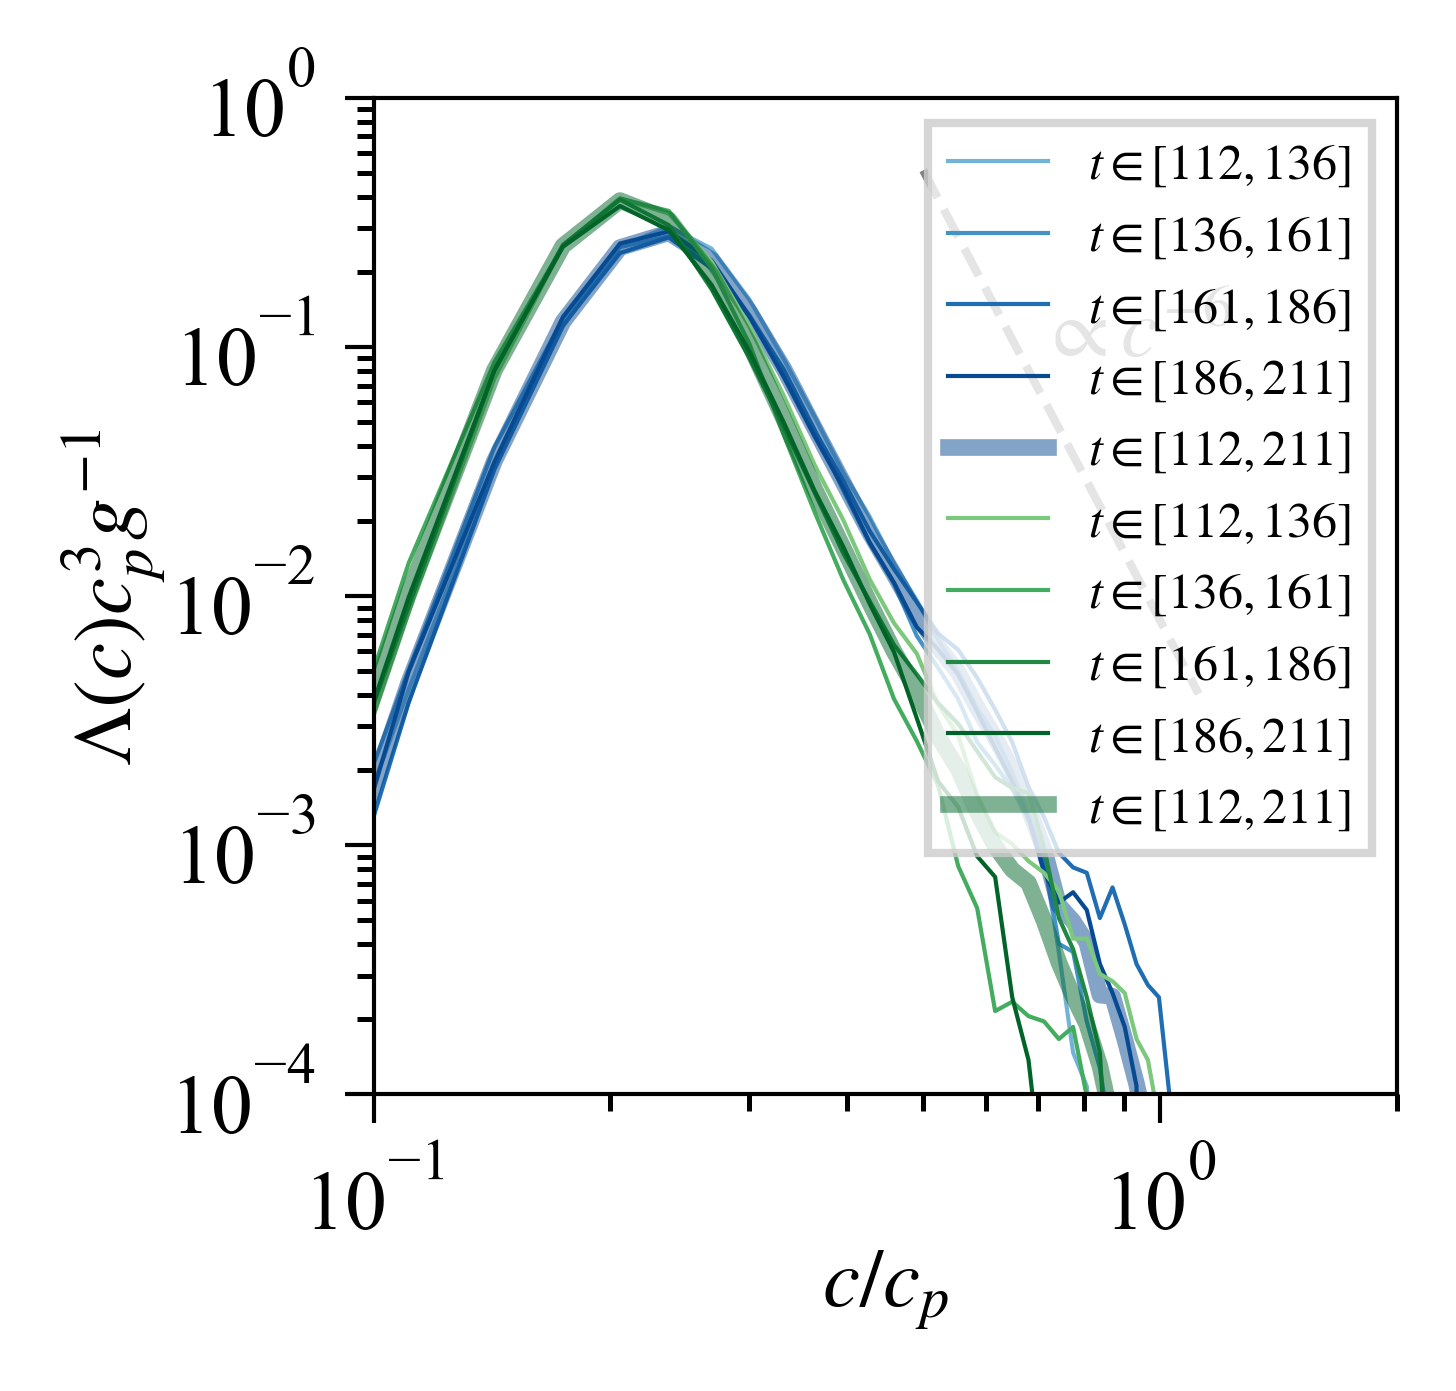

In [32]:
""" Normalized Lambda(x) distribution. Two Gaussian comparison. """
fig = plt.figure(figsize=[2.2,2.2]); ax = plt.gca()

kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5

nc = 6
colors1 = [plt.get_cmap('Blues')(x) for x in np.linspace(0.2,0.9,nc)]
colors2 = [plt.get_cmap('Greens')(x) for x in np.linspace(0.2,0.9,nc)]
times = np.array([90,110,130,150,170])*omegap

for k, config in enumerate(config_set[:]):
    for j,case in enumerate(config.cases):
        normx = (9.8/config.kp)**0.5
        normy = 1/((9.8/config.kp)**1.5/9.8)
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            average = np.array(case.hist_ensem['hist_ensem'][0])*0
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    average = average + np.array(hist)
                    if k == 0:
                        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, c=colors1[i+2], linestyle='-', 
                                 alpha=1, lw=0.5, label=r'$t\in[%.0f, %.0f]$' %(times[i], times[i+1]))  
                    if k == 1:
                        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, c=colors2[i+2], linestyle='-', 
                                 alpha=1, lw=0.5, label=r'$t\in[%.0f, %.0f]$' %(times[i], times[i+1]))  
            average = np.array(average)/len(case.hist_ensem['hist_ensem'])   
            if k == 0:
                plt.plot(bins_plotting/normx, average/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=r'$t\in[%.0f, %.0f]$' %(times[0], times[-1]), 
                         c=colors1[i+2], linestyle='-', alpha=0.5, lw=2) 
            if k == 1:
                plt.plot(bins_plotting/normx, average/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=r'$t\in[%.0f, %.0f]$' %(times[0], times[-1]), 
                         c=colors2[i+2], linestyle='-', alpha=0.5, lw=2) 

                    
plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

x_ = np.linspace(0.5, 1.12, 100)
y_ = x_**(-6)*0.008
plt.plot(x_, y_, '--', c='gray', alpha=1, lw=1)
ax.annotate(r'$\propto c^{-6}$', xy=(0.65, 0.8), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=10)

plt.xlim([0.1,2])
plt.ylim([10**(-4),10**(0)])
 
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0)
# plt.xlabel(r'$c/((k_pH_s)^{1/2} c_p)$', labelpad=0) # equivalent to plt.xlabel(r'$c/\sqrt{gH_s}$', labelpad=0)
# plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}(k_pH_s)^{-1/2}$', labelpad=0) # equivalent to plt.ylabel(r'$\Lambda(c)\sqrt{gH_s}^3g^{-1}(k_pH_s)^4$', labelpad=0)


""" Normalized """
# x_ = np.linspace(0.2, 1, 100)
# y_ = x_**(-5)*0.00045
# plt.plot(x_, y_, '--', c='gray', alpha=1, lw=0.5)
# y_ = x_**(-6)*0.0002
# plt.plot(x_, y_, '--', c='gray', alpha=1, lw=0.5)
# ax.annotate(r'$\propto c^{-6}$', xy=(0.65, 0.55), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=10)

plt.legend(fancybox=False, loc='upper right', fontsize=6)
# fig.savefig('figures_revision/time_aver.pdf', bbox_inches='tight', pad_inche=0.)


0.16442041564999021
0.16059055805358852
0.1589780548508293
0.1573920182710228
average = 0.160345
0.16106851377031117
0.1582334763355422
0.15585284607771
0.15390545917612292
average = 0.157265


/tmp/ipykernel_261633/565917461.py:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/Gaussian_time_aver_together.pdf', bbox_inches='tight', pad_inche=0.)


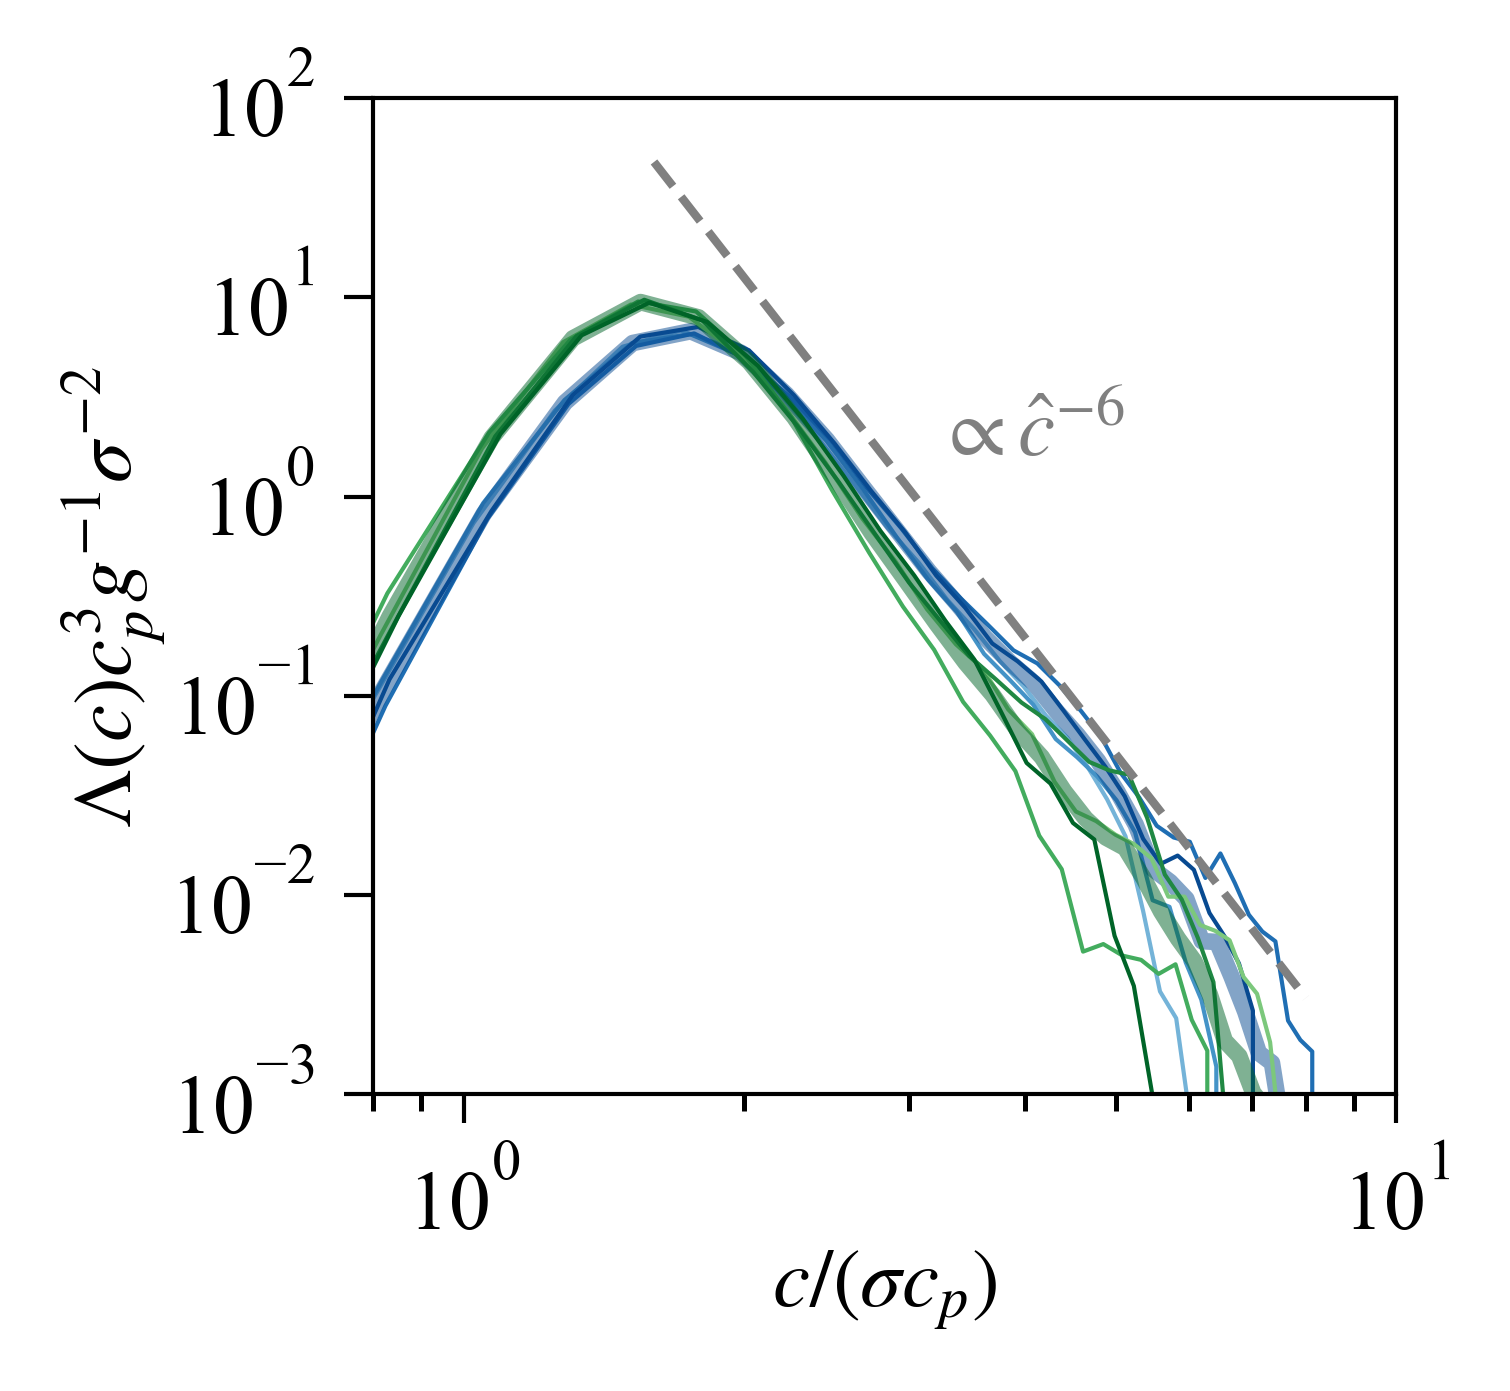

In [167]:
""" For a talk """
fig = plt.figure(figsize=[2.2,2.2]); ax = plt.gca()

for k, config in enumerate(config_set[:]):
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2              
            average = case.hist_ensem['hist_ensem'][0]*0
            
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                normx = case.cp_spec * case.mu_ensem[i+2][-1] ** 1 # The first two sigmas are not included
                normy = 1/(case.cp_spec**3/9.8) * case.mu_ensem[i+2][-1] ** 2
                print(case.mu_ensem[i+2][-1])
                average = average + np.array(hist)
                if case.Htheta == 0.503:
                    if k == 0:
                        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                                 label=r'$t\in[%.0f, %.0f]$' %(times[0], times[-1]), c=colors1[i+2], linestyle='-', alpha=1, lw=0.5)            # The extra filter 
                    if k == 1:
                        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                                 label=r'$t\in[%.0f, %.0f]$' %(times[0], times[-1]), c=colors2[i+2], linestyle='-', alpha=1, lw=0.5)            # The extra filter 
 
            average = average/len(case.hist_ensem['hist_ensem'])              
            mu_aver = np.average(case.mu_ensem[2:], axis=0)
            normx = case.cp_spec * mu_aver[-1] ** 1
            normy = 1/(case.cp_spec**3/9.8) * mu_aver[-1] ** 2
            if k == 0:
                print('average = %g' %mu_aver[-1])
                plt.plot(bins_plotting/normx, average/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=r'$\omega_p t\in[%.0f, %.0f]$' %(times[0], times[-1]), 
                         c=colors1[i+2], linestyle='-', alpha=0.5, lw=2) 
            if k == 1:
                print('average = %g' %mu_aver[-1])
                plt.plot(bins_plotting/normx, average/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=r'$\omega_p t\in[%.0f, %.0f]$' %(times[0], times[-1]), 
                         c=colors2[i+2], linestyle='-', alpha=0.5, lw=2) 

                    
plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.8,10])
plt.ylim([10**(-3),10**2])
 
plt.xlabel(r'$c/(\sigma c_p)$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}\sigma^{-2}$', labelpad=0)
ax.set_yticks([10**(-3), 10**(-2), 10**(-1), 10**(0), 10**(1), 10**2])
# plt.xlabel(r'$c/((k_pH_s)^{1/2} c_p)$', labelpad=0) # equivalent to plt.xlabel(r'$c/\sqrt{gH_s}$', labelpad=0)
# plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}(k_pH_s)^{-1/2}$', labelpad=0) # equivalent to plt.ylabel(r'$\Lambda(c)\sqrt{gH_s}^3g^{-1}(k_pH_s)^4$', labelpad=0)

""" Normalized """
x_ = np.linspace(1.6, 8, 100)
y_ = x_**(-6)*800
plt.plot(x_, y_, '--', c='gray', alpha=1, lw=1)
ax.annotate(r'$\propto\hat{c}^{-6}$', xy=(0.55, 0.7), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=10)
fig.savefig('figures_revision/Gaussian_time_aver_together.pdf', bbox_inches='tight', pad_inche=0.)

In [ ]:
""" Normalized Lambda(x) distribution. Also include different lines for different angle spread. """
fig = plt.figure(figsize=[2.2,2.2]); ax = plt.gca()

kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5

nc = 6
colors = [plt.get_cmap('Blues')(x) for x in np.linspace(0.2,0.9,nc)]
times = np.array([90,110,130,150,170])*omegap

for k, config in enumerate(config_set[:1]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
        normx = (9.8/config.kp)**0.5
        normy = 1/((9.8/config.kp)**1.5/9.8)
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            average = np.array(case.hist_ensem['hist_ensem'][0])*0
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    average = average + np.array(hist)
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, c=colors[i+2], linestyle='-', 
                             alpha=1, lw=0.5, label=r'$t\in[%.0f, %.0f]$' %(times[i], times[i+1]))  
            average = np.array(average)/len(case.hist_ensem['hist_ensem'])        
            plt.plot(bins_plotting/normx, average/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=r'$t\in[%.0f, %.0f]$' %(times[0], times[-1]), c=colors[i+2], linestyle='-', alpha=0.5, lw=2) 
                    
plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

x_ = np.linspace(0.5, 1.12, 100)
y_ = x_**(-6)*0.008
plt.plot(x_, y_, '--', c='gray', alpha=1, lw=1)
ax.annotate(r'$\propto c^{-6}$', xy=(0.65, 0.8), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=10)

plt.xlim([0.1,2])
plt.ylim([10**(-4),10**(0)])
 
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0)
# plt.xlabel(r'$c/((k_pH_s)^{1/2} c_p)$', labelpad=0) # equivalent to plt.xlabel(r'$c/\sqrt{gH_s}$', labelpad=0)
# plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}(k_pH_s)^{-1/2}$', labelpad=0) # equivalent to plt.ylabel(r'$\Lambda(c)\sqrt{gH_s}^3g^{-1}(k_pH_s)^4$', labelpad=0)


""" Normalized """
# x_ = np.linspace(0.2, 1, 100)
# y_ = x_**(-5)*0.00045
# plt.plot(x_, y_, '--', c='gray', alpha=1, lw=0.5)
# y_ = x_**(-6)*0.0002
# plt.plot(x_, y_, '--', c='gray', alpha=1, lw=0.5)
# ax.annotate(r'$\propto c^{-6}$', xy=(0.65, 0.55), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=10)

plt.legend(fancybox=False, loc='upper right', fontsize=6)
# fig.savefig('figures_revision/time_aver.pdf', bbox_inches='tight', pad_inche=0.)


In [27]:
""" Time dependent spectrum """
nc = 6
colors = [plt.get_cmap('Blues')(x) for x in np.linspace(0.1,0.9,nc)]
times = [0,60,100,120,140,160]

for config in (config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            case.mu_ensem = []
            case.Hskp_ensem = []
            case.Fkmod_ensem = []
            for i in range (0,nc):
                t = times[i]
                eta = case.read_t(fieldname='eta', t=t)  
                case.kmod, Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
                mu = steepness_trunc (Fkmod, case.kmod)
                case.mu_ensem.append(mu)
                Hskp = np.var(eta)**0.5*4*case.config.kp
                case.Hskp_ensem.append(Hskp)
                config.kmod = case.kmod
                case.Fkmod_ensem.append(Fkmod)
                print('t=%g, sigma=%g, kpHs=%g' %(t, mu[-1], Hskp))

N=1024, L=200
t=0, sigma=0.224792, kpHs=0.293808
N=1024, L=200
t=60, sigma=0.174548, kpHs=0.245678
N=1024, L=200
t=100, sigma=0.16442, kpHs=0.239486
N=1024, L=200
t=120, sigma=0.160591, kpHs=0.23869
N=1024, L=200
t=140, sigma=0.158978, kpHs=0.237188
N=1024, L=200
t=160, sigma=0.157392, kpHs=0.234829
N=1024, L=200
t=0, sigma=0.220442, kpHs=0.254592
N=1024, L=200
t=60, sigma=0.170915, kpHs=0.209981
N=1024, L=200
t=100, sigma=0.161069, kpHs=0.205182
N=1024, L=200
t=120, sigma=0.158233, kpHs=0.204339
N=1024, L=200
t=140, sigma=0.155853, kpHs=0.20315
N=1024, L=200
t=160, sigma=0.153905, kpHs=0.201673


In [39]:
""" Output F_kxky 200m case Gaussian """
def spectrum_Gaussian (G, span, kp, kmod):
    F_kmod = (G/span)*np.exp(-0.5*((kmod-kp)**2/span**2))
    return F_kmod

def spectrum_gen_Gaussian (kp=2*np.pi/100, G=0.5, span=0.1, L=200, N_power=5):
    N_mode = 32; # Uniform grid in kx and ky : how many we want to put in the initialization
    N_kmod = 64; N_theta = 64 # Uniform grid in kmod and ktheta, can be finer than N_mode 
    thetam = 0 # midline direction
    kmod = np.linspace(2*np.pi/L,1.41*100*2*np.pi/L,N_kmod) # Change 
    theta = np.linspace(-0.5*np.pi, 0.5*np.pi, N_theta) + thetam # Centered around thetam
    kmod_tile, theta_tile = np.meshgrid(kmod,theta)
    """ Gaussian """
    F_kmod = spectrum_Gaussian(G, span, kp, kmod)
    D_theta = np.abs(np.cos(theta-thetam)**N_power)
    dtheta = theta[1]-theta[0]
    """ Is this necessary? Yes! """
    D_theta = D_theta/np.trapz(D_theta, theta)  # Normalize so the sum equals one
    F_kmod_tile, D_theta_tile = np.meshgrid(F_kmod,D_theta) 
    F_kmodtheta_tile = F_kmod_tile*D_theta_tile/kmod_tile # Notice!! Normalize by k
    """ Uniform grid in kx,ky """
    kx = np.arange(1,N_mode+1)*2*np.pi/L # based on the grid, interval can't go smaller then pi/L
    ky = np.arange(-N_mode/2,N_mode/2+1)*2*np.pi/L
    kx_tile, ky_tile = np.meshgrid(kx,ky)
    kxp_tile, kyp_tile = pol2cart(kmod_tile, theta_tile)
    """ Project from uniform k to uniform kx,ky """
    F_kxky_tile = griddata((kxp_tile.ravel(), kyp_tile.ravel()), F_kmodtheta_tile.ravel(), (kx_tile, ky_tile), 
                            method='linear', fill_value=0) # Interpolate from kxp,kyp (uniform in k) to kx,ky (uniform in kx,ky)
    return kmod, F_kmod, kx, ky, F_kxky_tile

kp = 2*np.pi/40 # peak at 40m
G = 0.15
span = 0.8
kmod, F_kmod, kx, ky, F_kxky_tile = spectrum_gen_Gaussian(kp, G, span, L=200)
kx_tile, ky_tile = np.meshgrid(kx,ky)

mu = steepness_trunc (F_kmod, kmod)
print('mu = %g' %mu[-1])

mu = 0.403605


In [212]:
N_grid = 1024
x = np.linspace(-L/2,L/2,N_grid); y = np.linspace(-L/2,L/2,N_grid)
x_tile, y_tile = np.meshgrid(x, y)

kmod_cart_tile, theta_cart_tile = cart2pol(kx_tile,ky_tile)
omega_tile = (9.8*kmod_cart_tile)**0.5 # frequency based on kx or kmod
dkx = kx_tile[0,1]-kx_tile[0,0]; dky = ky_tile[1,0]-ky_tile[0,0]

eta_tile, phase_tile = eta_random(0, N_grid, kx_tile, ky_tile, F_kxky_tile, dkx, dky, omega_tile)

In [213]:
kmod0, F_kmod0 = spectrum_integration(eta_tile, CHECK=False, L=config.L0, N=2**case.LEVEL)
mu0 = steepness_trunc (F_kmod0, kmod0)

N=1024, L=200


c_max = 6.67558
c_max = 6.67558


/tmp/ipykernel_261633/3492723358.py:54: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/Gaussian_spectrum_together.pdf', bbox_inches='tight', pad_inche=0.)


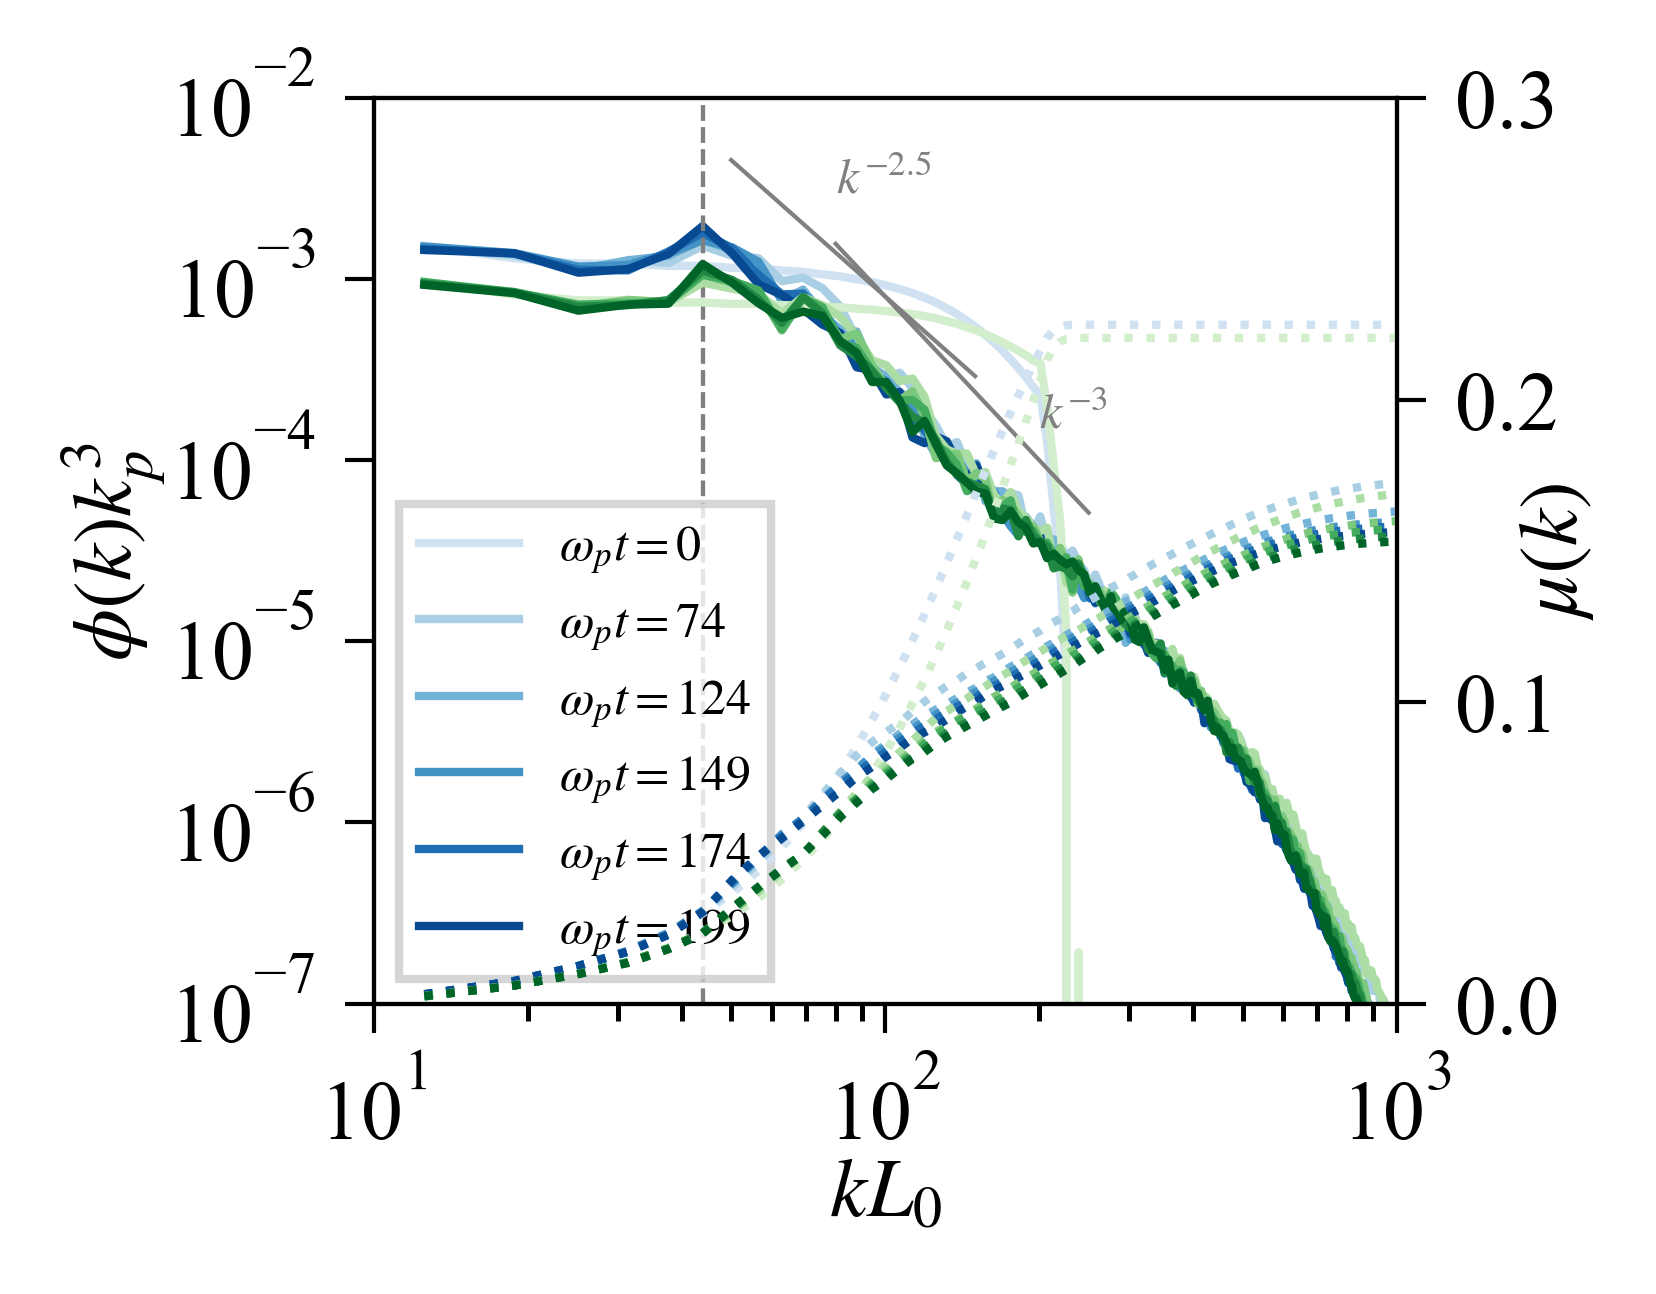

In [160]:
""" Time varying spectrum """
fig = plt.figure(figsize = [2.2,2]); ax = plt.gca()
ax2 = ax.twinx()

# Limit of resolution
N = 1024; L = 200; kp = 2*np.pi/(L/5); omegap = (9.8*kp)**0.5
k_m = 2*np.pi/(L/N*4)

nc = 6
colors1 = [plt.get_cmap('Blues')(x) for x in np.linspace(0.2,0.9,nc)]
colors2 = [plt.get_cmap('Greens')(x) for x in np.linspace(0.2,0.9,nc)]

times = [0,60,100,120,140,160]

for (k,config) in enumerate(config_set[0:2]):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):       
            imax = np.argmax(case.Fkmod_ensem[-1]) 
            case.cp_spec = (9.8/case.kmod[imax])**0.5
            ax.axvline(case.kmod[imax]*case.config.L0,ls='--',color='C7',lw=0.5)
            print('c_max = %g' %case.cp_spec)
            for i in range (0,nc):           
                t = times[i]
                if k ==0:
                    ax.plot(case.kmod[2:]*config.L0, case.Fkmod_ensem[i][2:]*config.kp**3, lw=1, 
                            label='$\omega_p t=%.0f$' %(t*omegap), c=colors1[i])
                    ax2.plot(case.kmod[2:]*config.L0, case.mu_ensem[i][2:], ':', lw=1, c=colors1[i])
                if k ==1:
                    ax.plot(case.kmod[2:]*config.L0, case.Fkmod_ensem[i][2:]*config.kp**3, lw=1, 
                            c=colors2[i])
                    ax2.plot(case.kmod[2:]*config.L0, case.mu_ensem[i][2:], ':', lw=1, c=colors2[i])
                    
ax.plot(np.arange(50,150,0.05), np.arange(50,150,0.05)**(-2.5)*80, lw=0.5, c='gray')
ax.text(80, 0.003, '$k^{-2.5}$', c='gray', fontsize=6)
ax.plot(np.arange(80,250,0.05), np.arange(80,250,0.05)**(-3.)*800, lw=0.5, c='gray')
ax.text(200, 0.00015, '$k^{-3}$', c='gray', fontsize=6)

ax.set_ylabel('$\phi(k)k_p^3$', labelpad=0)
ax.set_xlabel('$kL_0$', labelpad=0)
ax2.set_ylabel('$\mu(k)$', labelpad=-5)
# ax2.axhline(0.1,ls='--',color='C7',lw=0.5)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax.legend(loc='lower left', fancybox=False, bbox_to_anchor=(1.4, 0.2), handlelength=0.8)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim([10,k_m*L])
ax.set_xlim([10,1000])
ax.set_ylim([10**(-7.),10**(-2.)])
ax2.set_ylim([0,0.3])
ax.set_yticks([10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2)])
ax.legend(fancybox=False, loc='lower left', fontsize=6)
fig.savefig('figures_revision/Gaussian_spectrum_together.pdf', bbox_inches='tight', pad_inche=0.)

### The case with longer integration time

In [ ]:
""" Demonstrate different time ensemble averaging techniques """
config_set = [config_re2] 
tseries_ensem = []
for i in range (0,4):
    tstart = 90 + i*20
    dt = 0.2
    tseries = np.arange(tstart, tstart+20, dt)
    tseries_ensem.append(tseries)
""" Compute the breaking stats """
for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            print (case.path)
            energy = read(case.path, 'energy_before_remap.dat')
            case.time_window(tseries_ensem, threshold=0, bins=[])

In [59]:
""" Time dependent spectrum """
nc = 6
colors = [plt.get_cmap('Blues')(x) for x in np.linspace(0.1,0.9,nc)]
times = [0,60,100,120,140,160]

for config in (config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            case.mu_ensem = []
            case.Hskp_ensem = []
            case.Fkmod_ensem = []
            for i in range (0,nc):
                t = times[i]
                eta = case.read_t(fieldname='eta', t=t)  
                case.kmod, Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
                mu = steepness_trunc (Fkmod, case.kmod)
                case.mu_ensem.append(mu)
                Hskp = np.var(eta)**0.5*4*case.config.kp
                case.Hskp_ensem.append(Hskp)
                config.kmod = case.kmod
                case.Fkmod_ensem.append(Fkmod)
                print('t=%g, sigma=%g, kpHs=%g' %(t, mu[-1], Hskp))

N=1024, L=200


/tmp/ipykernel_26373/4238408167.py:6: RuntimeWarning: invalid value encountered in double_scalars
  mu[i] = (np.sum(k[:i]**2*F[:i]*dk))**0.5


t=0, sigma=0.173424, kpHs=0.30141
N=1024, L=200
t=60, sigma=0.174538, kpHs=0.280771
N=1024, L=200
t=100, sigma=0.165023, kpHs=0.273208
N=1024, L=200
t=120, sigma=0.16203, kpHs=0.272296
N=1024, L=200
t=140, sigma=0.161911, kpHs=0.270768
N=1024, L=200
t=160, sigma=0.160103, kpHs=0.267217


/tmp/ipykernel_26373/4288401925.py:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/Long_spectrum.pdf', bbox_inches='tight', pad_inche=0.)


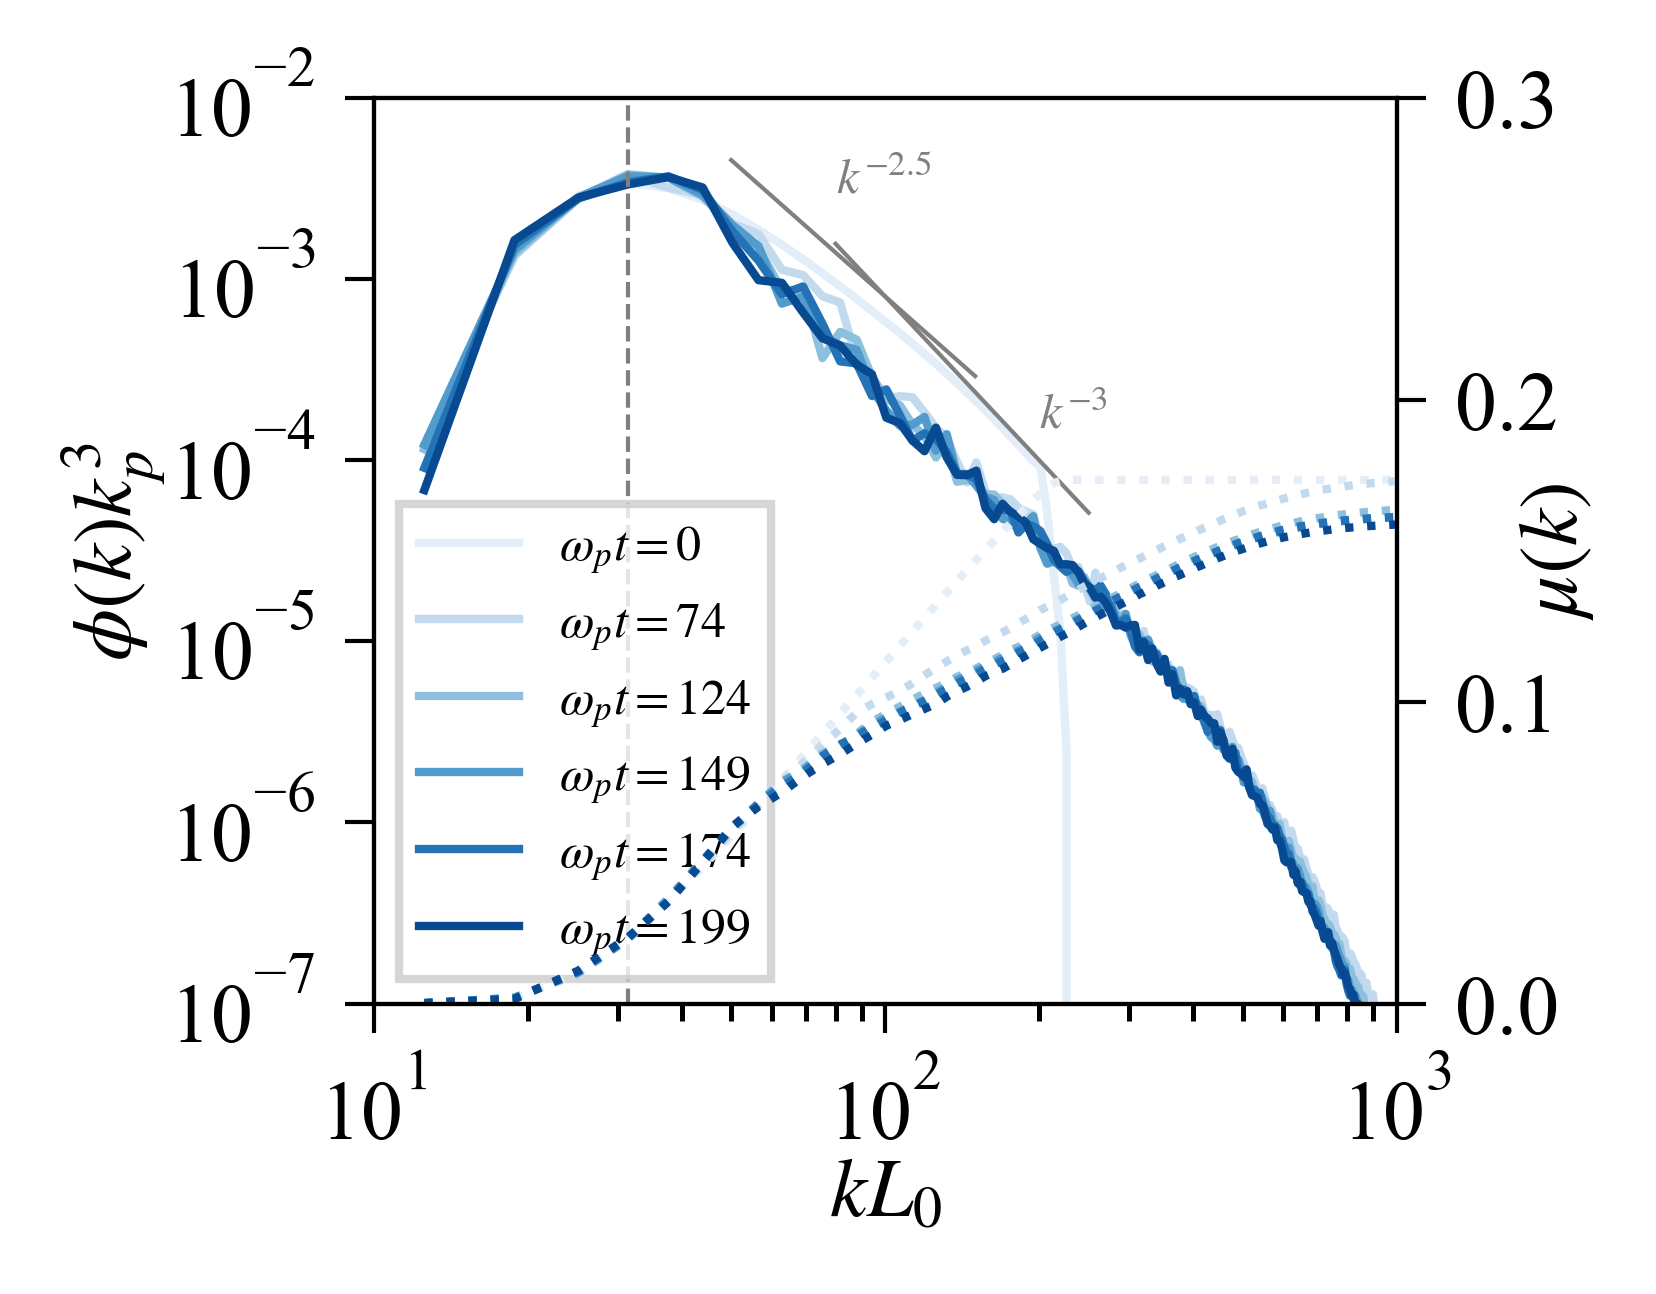

In [64]:
""" Time varying spectrum """
fig = plt.figure(figsize = [2.2,2]); ax = plt.gca()
ax2 = ax.twinx()

# Limit of resolution
N = 1024; L = 200; kp = 2*np.pi/(L/5); omegap = (9.8*kp)**0.5
k_m = 2*np.pi/(L/N*4)

nc = 6
colors1 = [plt.get_cmap('Blues')(x) for x in np.linspace(0.1,0.9,nc)]
colors2 = [plt.get_cmap('Greens')(x) for x in np.linspace(0.1,0.9,nc)]

times = [0,60,100,120,140,160]

for (k,config) in enumerate(config_set[0:2]):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
#             ax.plot(kmod[:]*config.L0, F_kmod[:]*config.kp**3, lw=1, 
#                     label='$\omega_p t=%.0f$' %(t*omegap), c='k')
#             ax2.plot(kmod[:]*config.L0, mu[:], ':', lw=1, c='k')    
#             ax.plot(kmod0[:]*config.L0, F_kmod0[:]*config.kp**3, lw=1, 
#                     label='$\omega_p t=%.0f$' %(t*omegap), c='k')
#             ax2.plot(kmod0[:]*config.L0, mu0[:], ':', lw=1, c='k')   
            for i in range (0,nc):           
                t = times[i]
                if k ==0:
                    ax.plot(case.kmod[2:]*config.L0, case.Fkmod_ensem[i][2:]*config.kp**3, lw=1, 
                            label='$\omega_p t=%.0f$' %(t*omegap), c=colors1[i])
                    ax2.plot(case.kmod[2:]*config.L0, case.mu_ensem[i][2:], ':', lw=1, c=colors1[i])
                if k ==1:
                    ax.plot(case.kmod[2:]*config.L0, case.Fkmod_ensem[i][2:]*config.kp**3, lw=1, 
                            c=colors2[i])
                    ax2.plot(case.kmod[2:]*config.L0, case.mu_ensem[i][2:], ':', lw=1, c=colors2[i])
                    
ax.plot(np.arange(50,150,0.05), np.arange(50,150,0.05)**(-2.5)*80, lw=0.5, c='gray')
ax.text(80, 0.003, '$k^{-2.5}$', c='gray', fontsize=6)
ax.plot(np.arange(80,250,0.05), np.arange(80,250,0.05)**(-3.)*800, lw=0.5, c='gray')
ax.text(200, 0.00015, '$k^{-3}$', c='gray', fontsize=6)

ax.set_ylabel('$\phi(k)k_p^3$', labelpad=0)
ax.set_xlabel('$kL_0$', labelpad=0)
ax2.set_ylabel('$\mu(k)$', labelpad=-5)
# ax2.axhline(0.1,ls='--',color='C7',lw=0.5)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax.legend(loc='lower left', fancybox=False, bbox_to_anchor=(1.4, 0.2), handlelength=0.8)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim([10,k_m*L])
ax.set_xlim([10,1000])
ax.set_ylim([10**(-7.),10**(-2.)])
ax2.set_ylim([0,0.3])
ax.axvline(2*np.pi/(L/5)*L,ls='--',color='C7',lw=0.5)
ax.set_yticks([10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2)])
ax.legend(fancybox=False, loc='lower left', fontsize=6)
fig.savefig('figures_revision/Long_spectrum.pdf', bbox_inches='tight', pad_inche=0.)

0.1615450815739007
0.1426335253273807
0.13088093765018952
0.12759126789398484
0.12768598450682353
0.12507897355877723


/tmp/ipykernel_155527/3341256268.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/slope_dist.pdf', bbox_inches='tight', pad_inche=0.)


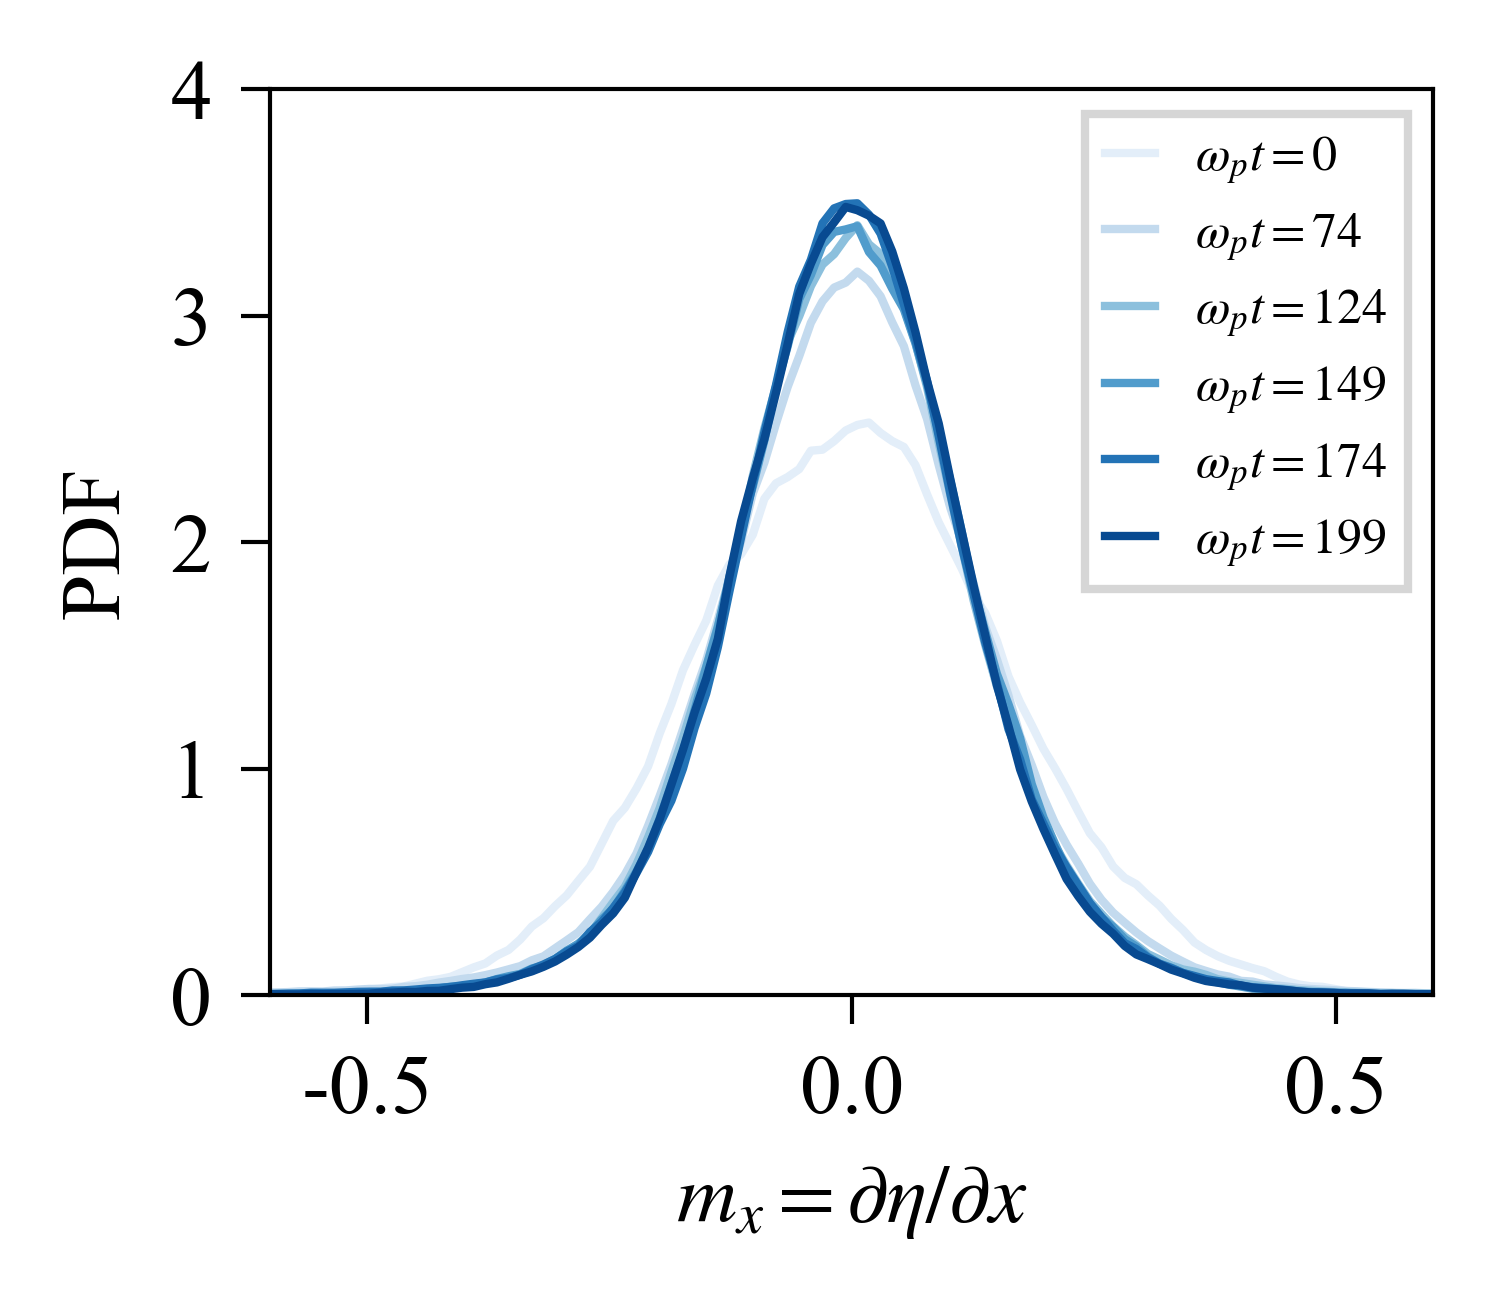

In [168]:
''' Time dependent energy, higher order statistics  '''
N = 1024; L = 200; dx = L/N

fig = plt.figure(figsize = [2.5,2]); ax = plt.gca()
# ax2 = ax.twinx()

left = -0.6; right = 0.6; nbin = 100
bins = np.linspace(left,right,nbin+1,endpoint=True)
bins_center = np.linspace(left,right,nbin,endpoint=False) + (right-left)/nbin/2

nc = 6
colors = [plt.get_cmap('Blues')(x) for x in np.linspace(0.1,0.9,nc)]
times = [0,60,100,120,140,160]

for config in (config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            for i in range (0, nc):
                t = times[i] 
                eta = case.read_t(fieldname='eta', t=t)  
                ddx = np.gradient(eta, axis=1)/dx
                counts, bins = np.histogram(ddx, density=True, bins=bins)
#                 plt.stairs(counts, bins)
#                 plt.plot(bins_center, counts, 'o', ms=2, markerfacecolor="None", markeredgewidth=0.5) #  markeredgecolor='red'
                sigma = np.var(ddx)**0.5
                plt.plot(bins_center, counts, lw=1, c=colors[i], label='$\omega_p t=%.0f$' %(t*omegap))
                print(sigma)

plt.ylim([0,4]); plt.xlim([-0.6,0.6])
plt.xlabel(r'$m_x = \partial \eta/\partial x$'); plt.ylabel(r'PDF')
plt.legend(fancybox=False, loc='upper right', fontsize=6, handlelength=1)
fig.savefig('figures_revision/slope_dist.pdf', bbox_inches='tight', pad_inche=0.)

0.07535246370412195
0.07019276186059305
0.068301958780152
0.06807406487403606
0.06769201896264761
0.06680426891423469


/tmp/ipykernel_155527/359394838.py:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/elevation_dist.pdf', bbox_inches='tight', pad_inche=0.)


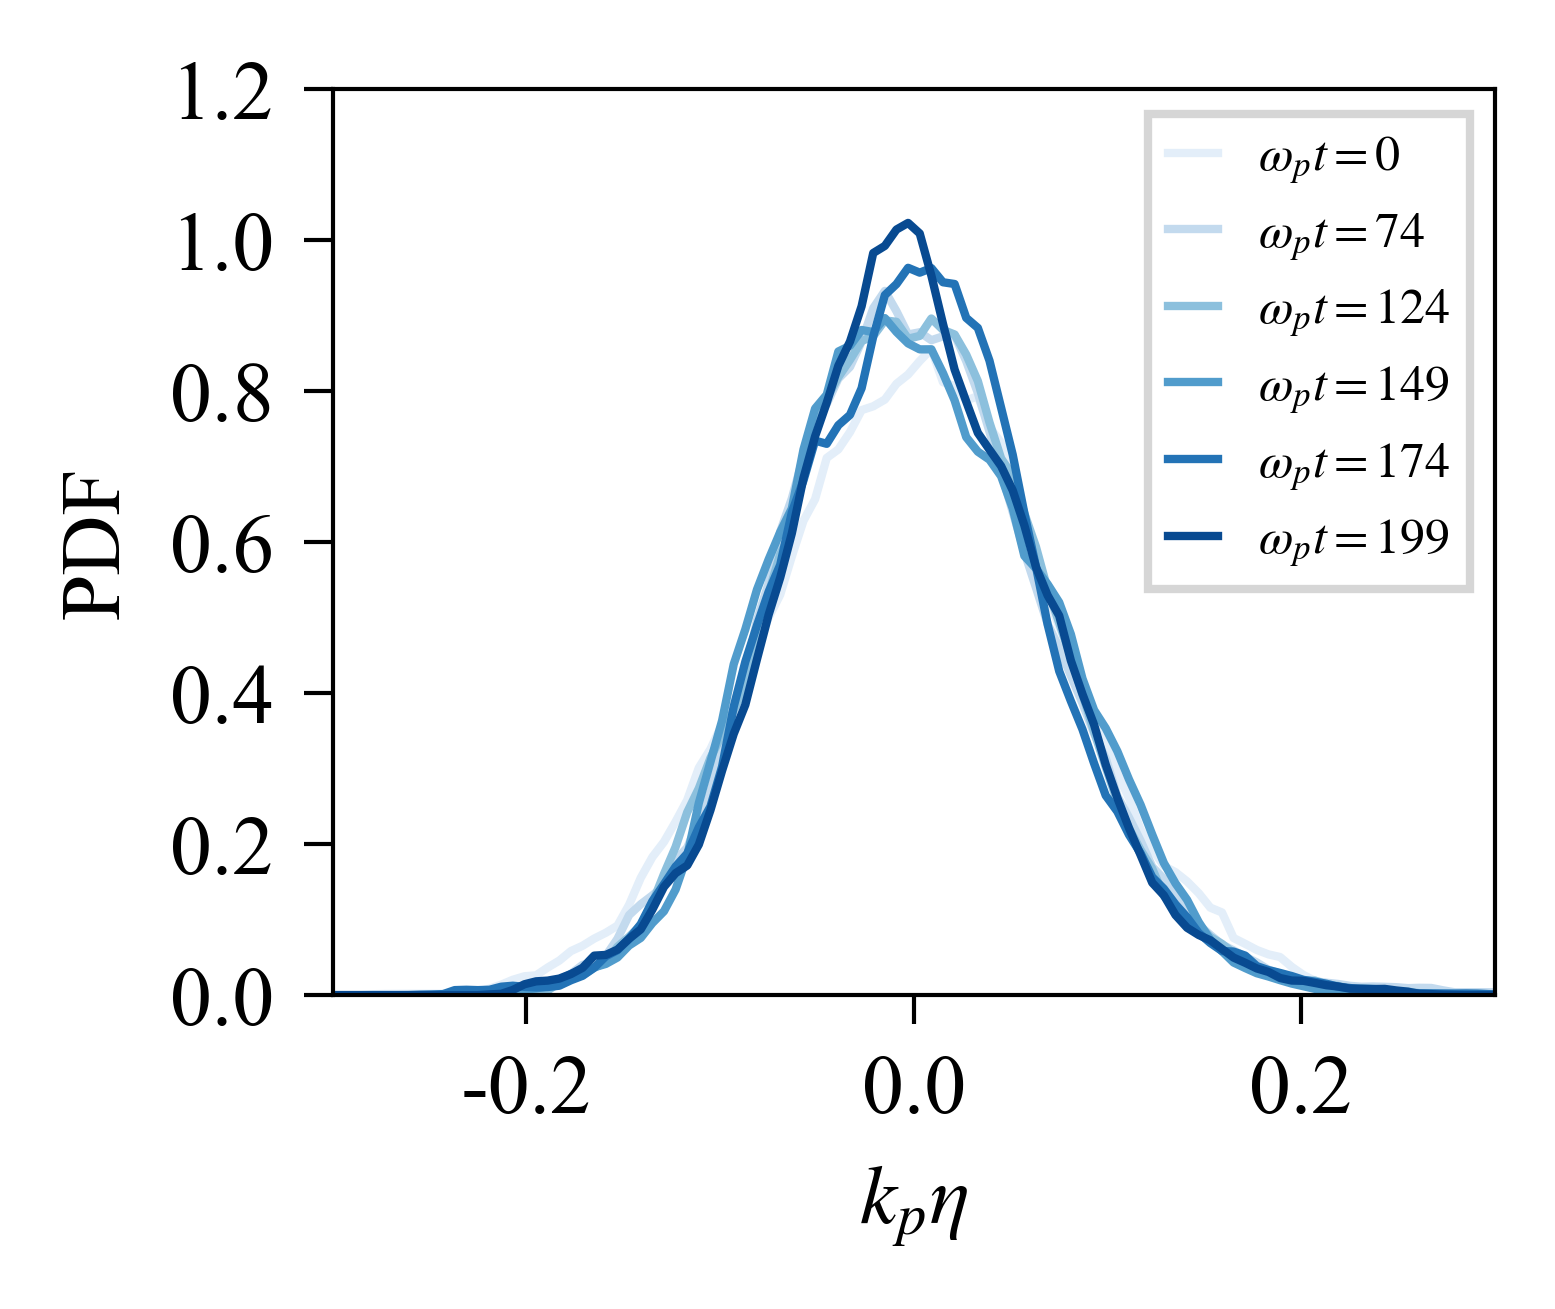

In [167]:
N = 1024; L = 200; dx = L/N

fig = plt.figure(figsize = [2.5,2]); ax = plt.gca()

left = -0.3/kp; right = 0.3/kp; nbin = 100
bins = np.linspace(left,right,nbin+1,endpoint=True)
bins_center = np.linspace(left,right,nbin,endpoint=False) + (right-left)/nbin/2

nc = 6
colors = [plt.get_cmap('Blues')(x) for x in np.linspace(0.1,0.9,nc)]
times = [0,60,100,120,140,160]

for config in (config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            for i in range (0,nc):
                t = times[i] 
                eta = case.read_t(fieldname='eta', t=t)  
                counts, bins = np.histogram(eta, density=True, bins=bins)
                plt.plot(bins_center*kp, counts, lw=1, c=colors[i], label='$\omega_p t=%.0f$' %(t*omegap))
                print(np.var(eta)**0.5*kp)

plt.ylim([0,1.2]); plt.xlim([left*kp,right*kp])
plt.xlabel(r'$k_p \eta$'); plt.ylabel(r'PDF')
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2])
plt.legend(fancybox=False, loc='upper right', fontsize=6, handlelength=1)
fig.savefig('figures_revision/elevation_dist.pdf', bbox_inches='tight', pad_inche=0.)

### Modify figure 3 (with evolution of the spectrum and characteristics

c_max = 7.89865


/tmp/ipykernel_164983/1050054507.py:66: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/Evolution_spectrum.pdf', bbox_inches='tight', pad_inche=0.)


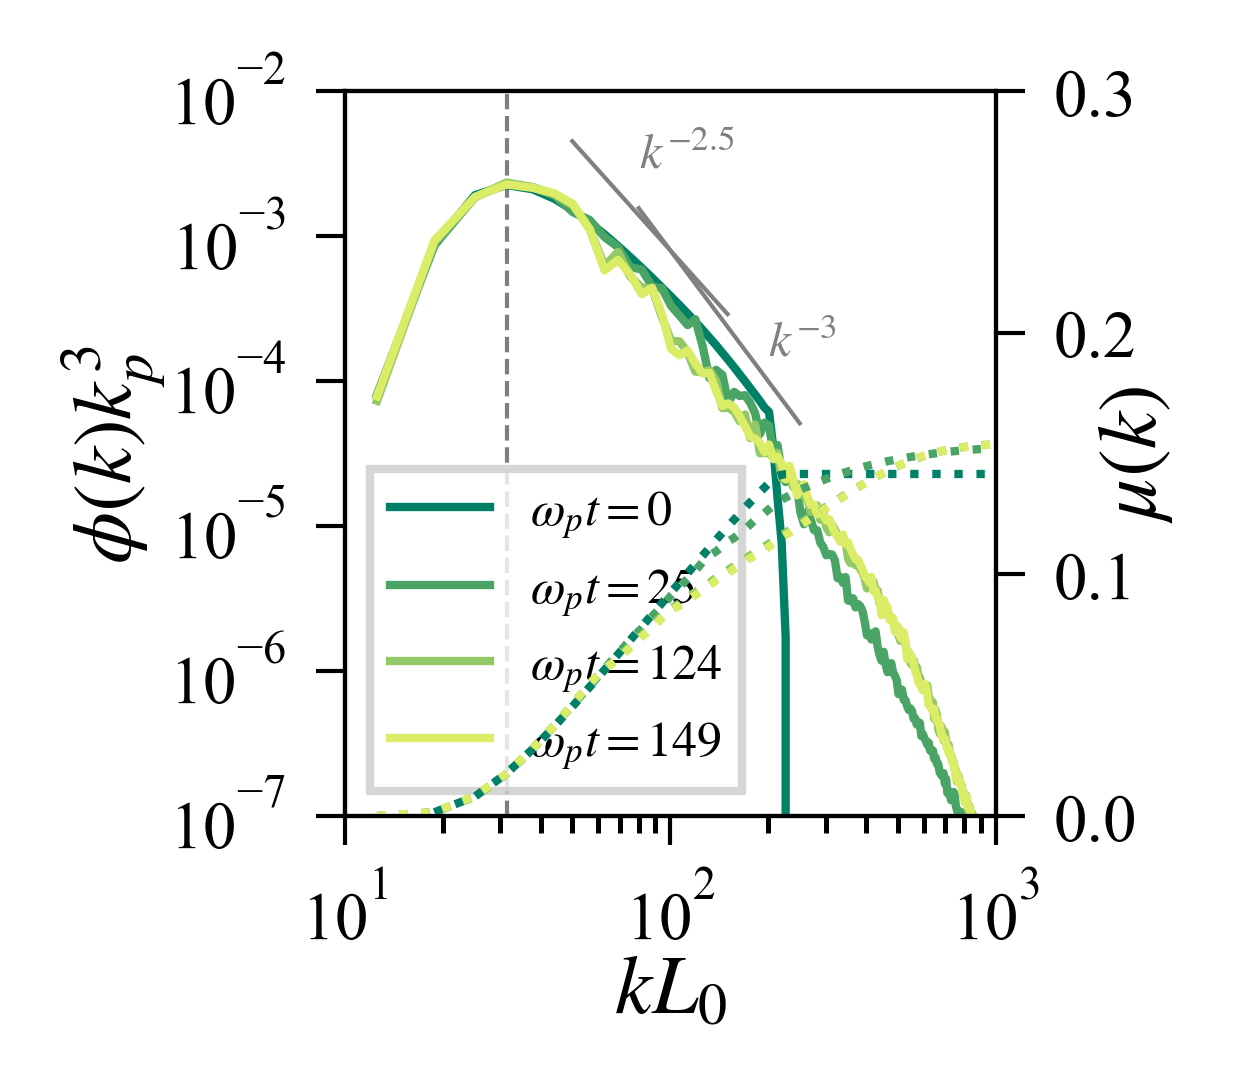

In [157]:
""" Time varying spectrum """
fig = plt.figure(figsize = [1.4,1.6]); ax = plt.gca()
ax2 = ax.twinx()

# Limit of resolution
N = 1024; L = 200; kp = 2*np.pi/(L/5); omegap = (9.8*kp)**0.5
k_m = 2*np.pi/(L/N*4)

config = config2_2

times = [0,20,100,120]
colors = [plt.cm.get_cmap('summer')(i/3.5) for i in (0,1,2,3)]

# for case in config.cases:
#     if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand == 2):
#         case.mu_ensem = []
#         case.Hskp_ensem = []
#         case.Fkmod_ensem = []
#         for i in range (0,len(times)):
#             t = times[i]
#             eta = case.read_t(fieldname='eta', t=t)  
#             case.kmod, Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
#             mu = steepness_trunc (Fkmod, case.kmod)
#             case.mu_ensem.append(mu)
#             Hskp = np.var(eta)**0.5*4*case.config.kp
#             case.Hskp_ensem.append(Hskp)
#             config.kmod = case.kmod
#             case.Fkmod_ensem.append(Fkmod)
#             print('t=%g, sigma=%g, kpHs=%g' %(t, mu[-1], Hskp))

for case in config.cases:
    if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand == 2):       
        imax = np.argmax(case.Fkmod_ensem[-1]) 
        case.cp_spec = (9.8/case.kmod[imax])**0.5
        ax.axvline(case.kmod[imax]*case.config.L0,ls='--',color='C7',lw=0.5)
        print('c_max = %g' %case.cp_spec)
        for i in range (0,len(times)):           
            t = times[i]
            ax.plot(case.kmod[2:]*config.L0, case.Fkmod_ensem[i][2:]*config.kp**3, lw=1, 
                    label='$\omega_p t=%.0f$' %(t*omegap), c=colors[i])
            ax2.plot(case.kmod[2:]*config.L0, case.mu_ensem[i][2:], ':', lw=1, c=colors[i])
                    
ax.plot(np.arange(50,150,0.05), np.arange(50,150,0.05)**(-2.5)*80, lw=0.5, c='gray')
ax.text(80, 0.003, '$k^{-2.5}$', c='gray', fontsize=6)
ax.plot(np.arange(80,250,0.05), np.arange(80,250,0.05)**(-3.)*800, lw=0.5, c='gray')
ax.text(200, 0.00015, '$k^{-3}$', c='gray', fontsize=6)

ax.set_ylabel('$\phi(k)k_p^3$', labelpad=0)
ax.set_xlabel('$kL_0$', labelpad=0)
ax2.set_ylabel('$\mu(k)$', labelpad=-5)
# ax2.axhline(0.1,ls='--',color='C7',lw=0.5)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax.legend(loc='lower left', fancybox=False, bbox_to_anchor=(1.4, 0.2), handlelength=0.8)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim([10,k_m*L])
ax.set_xlim([10,1000])
ax.set_ylim([10**(-7.),10**(-2.)])
ax2.set_ylim([0,0.3])
ax.set_yticks([10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2)])
ax.legend(fancybox=False, loc='lower left', fontsize=6)
ax.xaxis.set_tick_params(labelsize=8); ax.yaxis.set_tick_params(labelsize=8); ax2.yaxis.set_tick_params(labelsize=8)

fig.savefig('figures_revision/Evolution_spectrum.pdf', bbox_inches='tight', pad_inche=0.)

/tmp/ipykernel_164983/2748138845.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ', table_headers = ['t', 'ke', 'gpe'])
/tmp/ipykernel_164983/770598586.py:65: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/Field_energy_forpaper.pdf', bbox_inches='tight', pad_inche=0.)


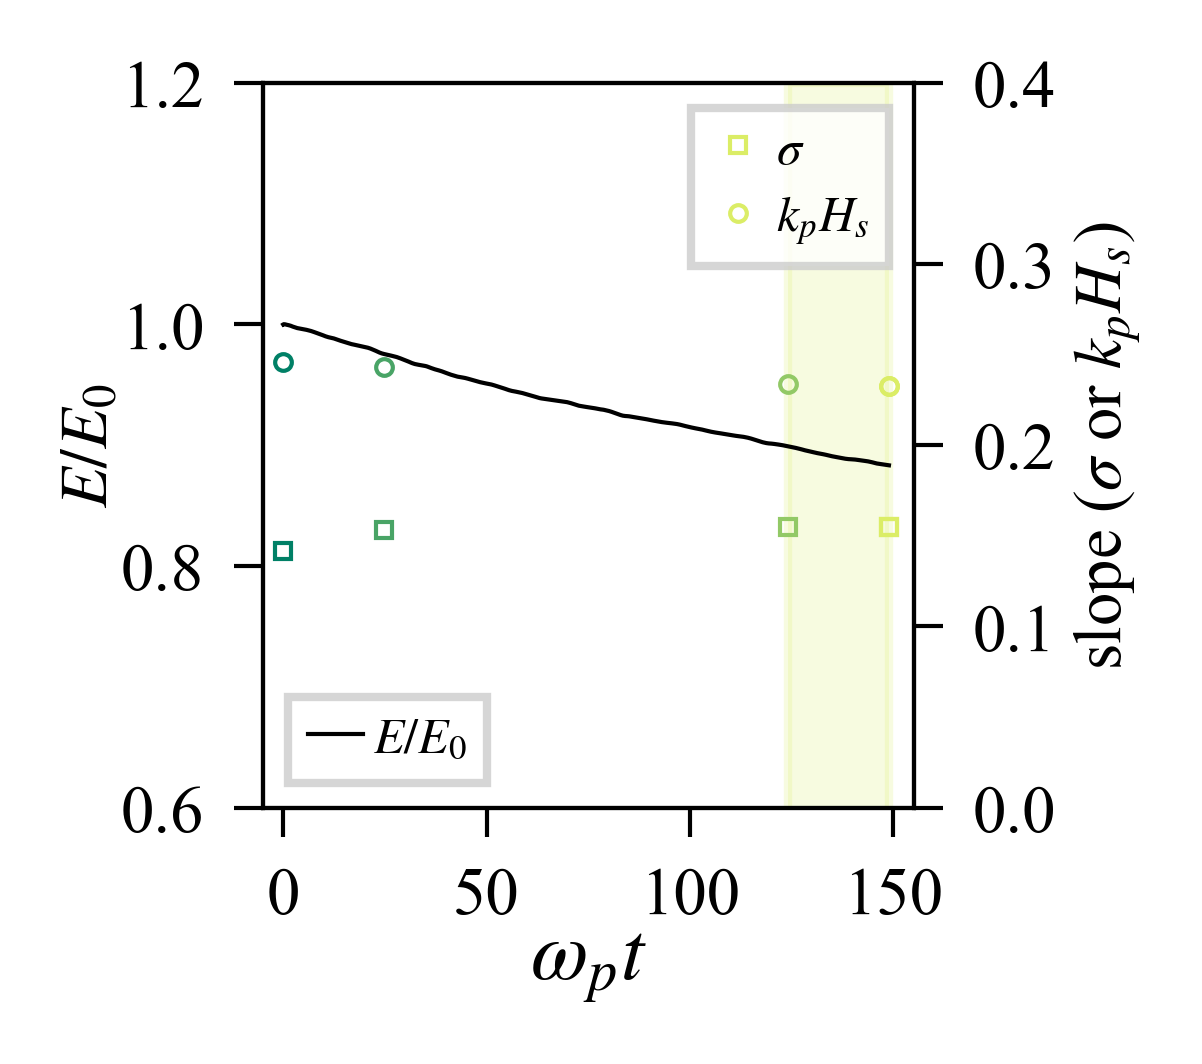

In [158]:
fig = plt.figure(figsize=[1.4,1.6]); ax = fig.gca(); ax2 = ax.twinx()
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5

times = [0,20,100,120]
colors = [plt.cm.get_cmap('summer')(i/3.5) for i in (0,1,2,3)]

config = config2_2
path = config.cases[0].path
energy = read(path, 'energy_before_remap.dat')
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', label=r'$E/E_0$', lw=0.5, c='k')
# ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0], '--', lw=0.5, c='C0')
# ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', lw=0.5, c='C0')

""" Time dependent spectrum """
# for case in config.cases:
#     if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1) and (case.rand == 2):
#         case.mu_ensem = []
#         case.Hskp_ensem = []
#         case.Fkmod_ensem = []
#         for i in range (0,len(times)):
#             t = times[i]
#             eta = case.read_t(fieldname='eta', t=t)  
#             case.kmod, Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
#             mu = steepness_trunc (Fkmod, case.kmod)
#             case.mu_ensem.append(mu)
#             Hskp = np.var(eta)**0.5*4*case.config.kp
#             case.Hskp_ensem.append(Hskp)
#             config.kmod = case.kmod
#             case.Fkmod_ensem.append(Fkmod)
#             print('t=%g, sigma=%g, kpHs=%g' %(t, mu[-1], Hskp))
                
for case in config.cases:
    if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1) and (case.rand == 2):
        eta = case.read_t(fieldname='eta', t=0)
        eta_var0 = np.var(eta)
        for i in range (0,len(times)):
            t = times[i] 
            eta = case.read_t(fieldname='eta', t=t)  
            ax2.plot(t*omegap, case.mu_ensem[i][-1], 's', lw=1, c=colors[i], ms=2, markerfacecolor="None", markeredgewidth=0.5)
            ax2.plot(t*omegap, 4*np.var(eta)**0.5*kp, 'o', lw=1, c=colors[i], ms=2, markerfacecolor="None", markeredgewidth=0.5)

        ax2.plot(t*omegap, case.mu_ensem[i][-1], 's', lw=1, c=colors[i], ms=2, markerfacecolor="None", markeredgewidth=0.5,
                 label=r'$\sigma$')
        ax2.plot(t*omegap, 4*np.var(eta)**0.5*kp, 'o', lw=1, c=colors[i], ms=2, markerfacecolor="None", markeredgewidth=0.5, 
                 label=r'$k_pH_s$')


ax.set_ylim([0.6,1.2])
ax.set_xlim([-5,155])
x = np.arange(100,121,1)*omegap
ax.fill_between(x, 0.4, 1.2, alpha=0.2, color=plt.cm.get_cmap('summer')(3/3.5))
ax.set_xticks([0, 50, 100, 150])
ax.set_yticks([0.6,0.8,1.0,1.2])
ax2.set_ylim([0,0.4])
ax2.set_ylabel('slope ($\sigma$ or $k_pH_s$)', labelpad=2, fontsize=8)
ax2.set_yticks([0,0.1,0.2,0.3,0.4])
ax2.tick_params(axis='both', labelsize=8)
ax.legend(fancybox=False, fontsize=6, handlelength=1.1, labelspacing=0.4, handletextpad=0.2, loc='lower left')
ax2.legend(fancybox=False, fontsize=6, handlelength=1.1, labelspacing=0.4, handletextpad=0.2, loc = 'upper right')
ax.set_xlabel(r'$\omega_p t$', labelpad=0)
ax.set_ylabel(r'$E/E_0$', labelpad=0, fontsize=8)
ax.tick_params(which='both', labelsize=8)
fig.savefig('figures_revision/Field_energy_forpaper.pdf', bbox_inches='tight', pad_inche=0.)

### Show insensitiveness to detection method

In [74]:
config_set = [config2_2, config2_3]

tseries_ensem = []
tstart = 100
dt = 0.2
tseries = np.arange(tstart, tstart+20, dt)
tseries_ensem.append(tseries)

for k, config in enumerate(config_set[:1]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            case.time_window(tseries_ensem, threshold=-3*case.config.kp, bins=[])
            hist_ensem1 = case.hist_ensem
            case.time_window(tseries_ensem, threshold=-2*case.config.kp, bins=[])
            hist_ensem2 = case.hist_ensem
            case.time_window(tseries_ensem, threshold=-4*case.config.kp, bins=[])
            hist_ensem3 = case.hist_ensem

P=0.02


P=0.02


/tmp/ipykernel_26373/503439049.py:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/criterion.pdf', bbox_inches='tight', pad_inche=0.)


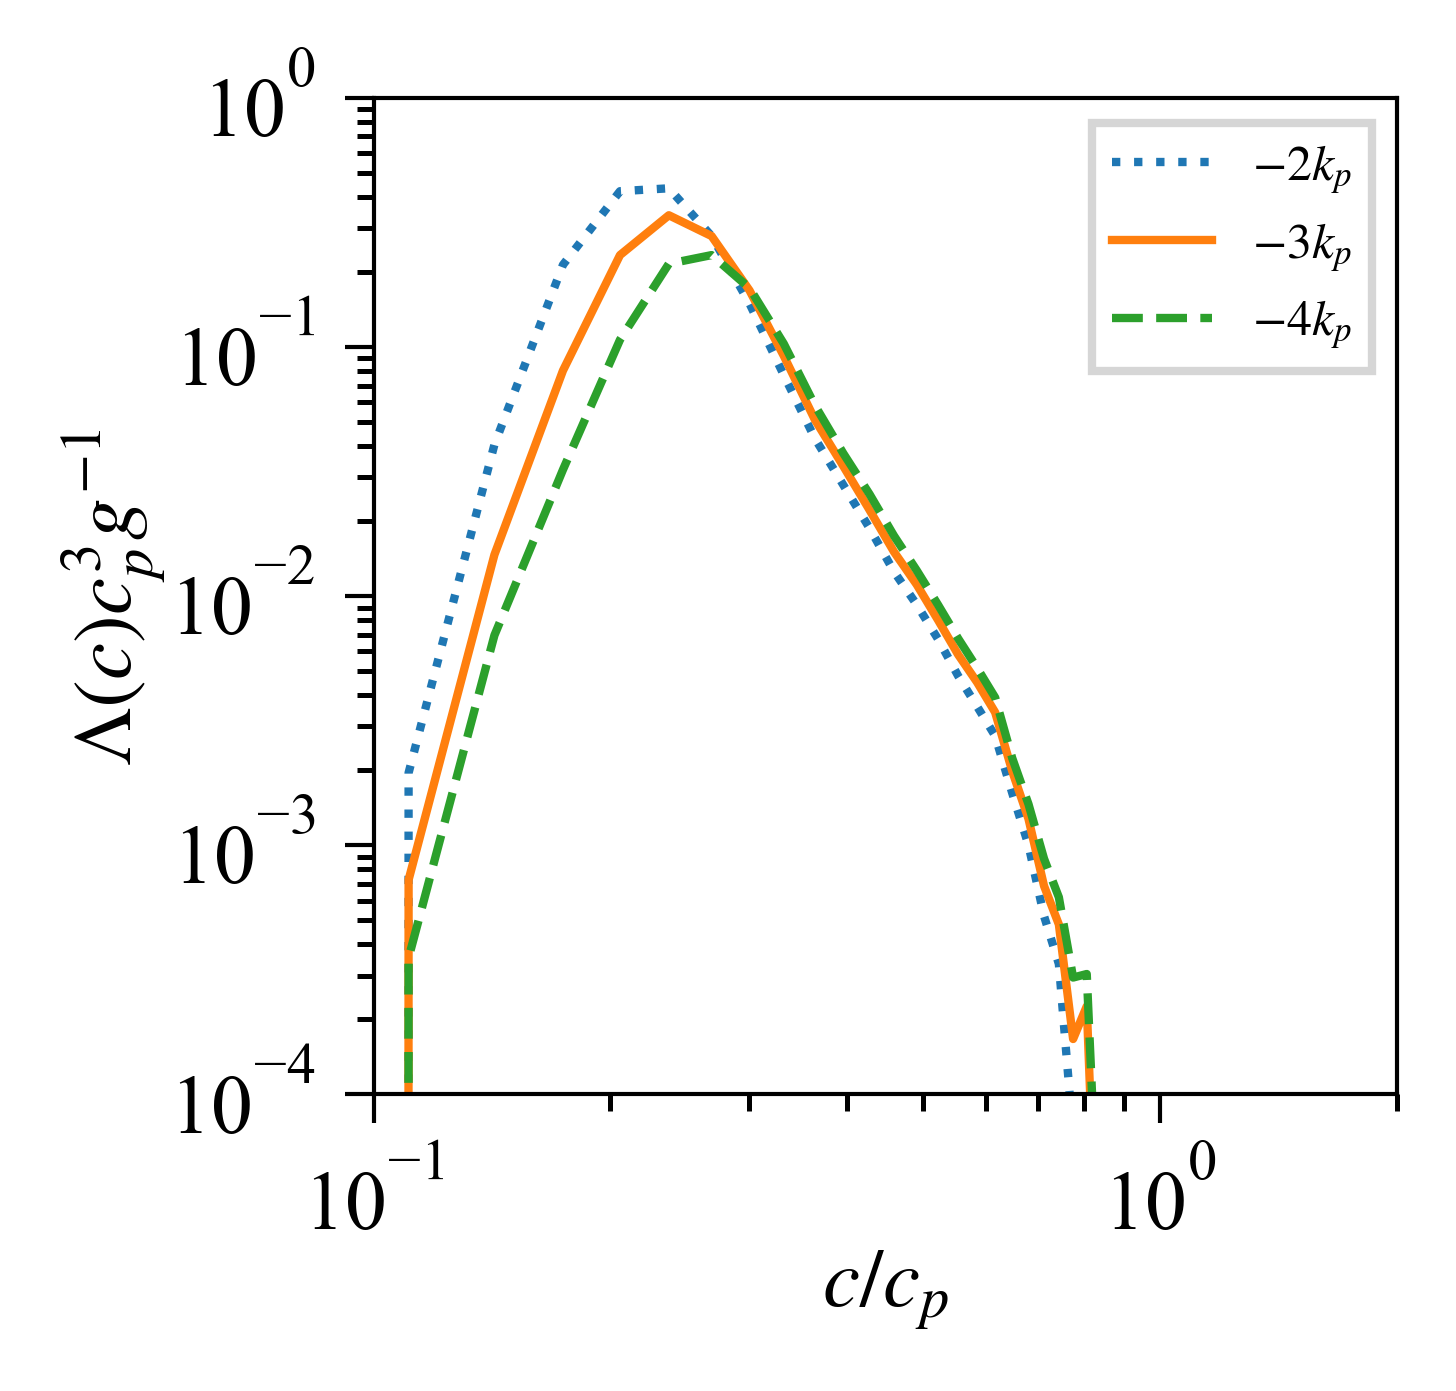

In [77]:

''' Compute the time dependent breaking statistics ''' 

fig = plt.figure(figsize=[2.2,2.2]); ax = plt.gca()

for k, config in enumerate(config_set[:1]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            normx = (9.8/config.kp)**0.5
            normy = 1/((9.8/config.kp)**1.5/9.8) 
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(hist_ensem2['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                             label='$-2k_p$', linestyle=':', alpha=1, lw=1)            # The extra filter 
            for i,hist in enumerate(hist_ensem1['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                             label='$-3k_p$', linestyle='-', alpha=1, lw=1)            # The extra filter 
            for i,hist in enumerate(hist_ensem3['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                             label='$-4k_p$', linestyle='--', alpha=1, lw=1)            # The extra filter 


plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.1,2])
plt.ylim([10**(-4),10**(0)])
 
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0)
# plt.xlabel(r'$c/((k_pH_s)^{1/2} c_p)$', labelpad=0) # equivalent to plt.xlabel(r'$c/\sqrt{gH_s}$', labelpad=0)
# plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}(k_pH_s)^{-1/2}$', labelpad=0) # equivalent to plt.ylabel(r'$\Lambda(c)\sqrt{gH_s}^3g^{-1}(k_pH_s)^4$', labelpad=0)

plt.legend(fancybox=False, loc='upper right', fontsize=6)
fig.savefig('figures_revision/criterion.pdf', bbox_inches='tight', pad_inche=0.)
# fig.savefig('figures_nondim/lambda_c_log_Npower.eps', bbox_inches='tight', pad_inche=0.)

### Two cases with different random number

/tmp/ipykernel_164983/3057234410.py:19: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Reds").copy()
  my_cmap.set_under('k', alpha=0)


Text(-90, -80, '$\\omega_p t=149$')

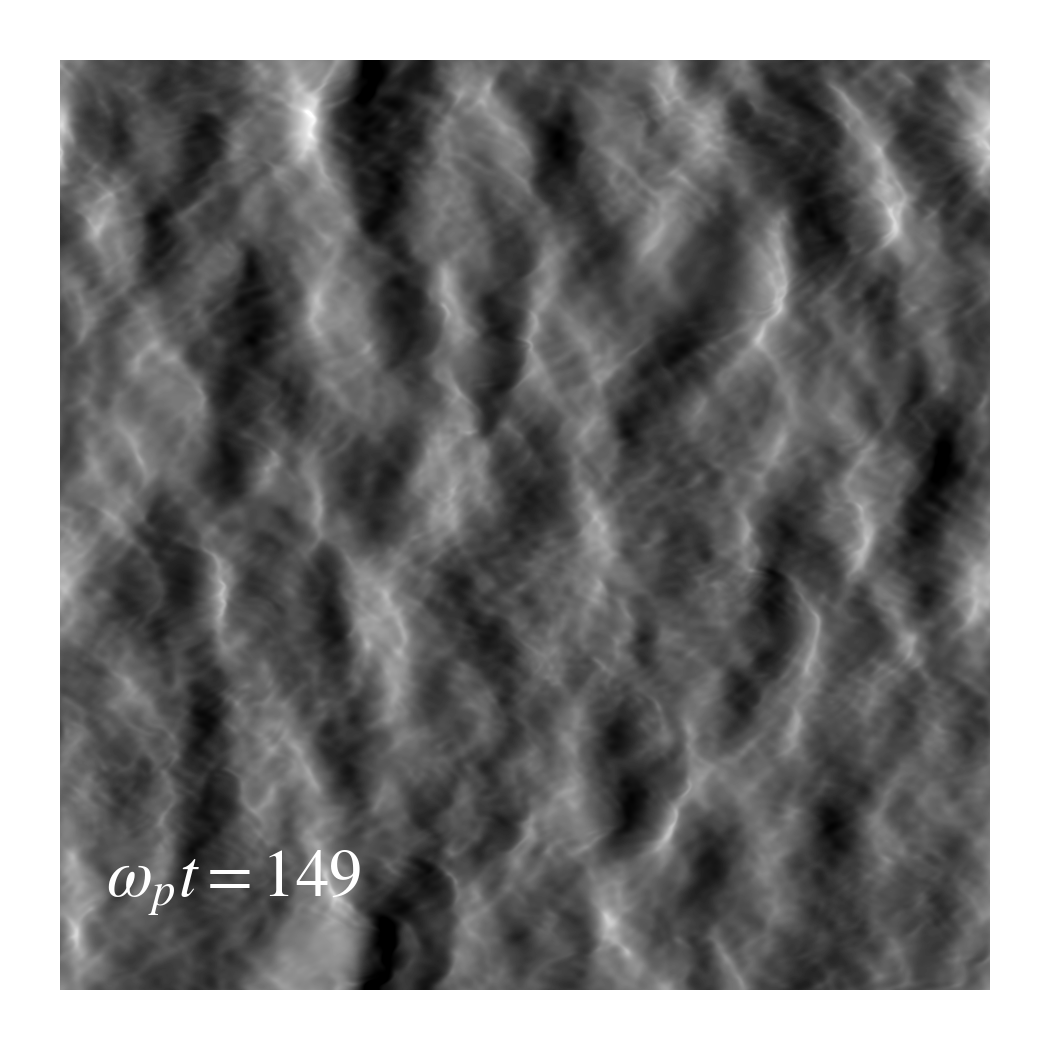

In [74]:
""" A visualization of where the breaking crests are. Reference of the plotting function:
    https://docs.scipy.org/doc/numpy-1.10.0/reference/routines.logic.html
    https://stackoverflow.com/questions/17170229/setting-transparency-based-on-pixel-values-in-matplotlib
"""
fig = plt.figure(figsize=[2,2.8]); ax = plt.gca()
from matplotlib.ticker import FuncFormatter, MultipleLocator

# case = config2_2.cases[-1] # rand 4
case = config2_2.cases[3] # rand 2

t = 120
threshold = -3*case.config.kp

eta = case.read_t('eta', t)
ux = case.read_t('ux', t)
uy = case.read_t('uy', t)

my_cmap = plt.cm.Reds
my_cmap.set_under('k', alpha=0)

a, b = detect_ridges(eta, sigma=1.0) # Maxima and minima ridges
delta = case.config.L0/2**case.LEVEL # Normalize the curvature by grid size
b_norm = b/delta**2                
b_ = np.logical_not(b_norm > threshold) # Is this value fixed???
height_filter = np.logical_not(eta < 2.5*np.var(eta)**0.5)
b_ = b_*height_filter
a_ = np.zeros(b_.shape) 
N = 512
for i in range(0,N-1):
    for j in range(1,N-1):
        if (b_[i][j-1] > 0) and (b_[i][j+1] == 0):
            a_[i][j] = 1

""" Nondim version """

image1 = ax.imshow(eta*case.config.kp, vmin=-0.15, vmax=0.3, cmap='gray', alpha=1, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2])
# image2 = ax.imshow(a_, cmap='Reds', interpolation='none', clim=[0.5,1.2], alpha=1, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2])

# cbar = plt.colorbar(image1, orientation='horizontal')
# cbar.ax.text(-0.15, 0.3, r'$k_p/\eta $', transform=cbar.ax.transAxes, fontsize=8)
# cbar.set_ticks([-0.15,0,0.15,0.3])
# cbar.ax.tick_params(labelsize=6, length=2, pad=2)
# ax.set_xticks([-case.config.L0/2, case.config.L0/2]); ax.set_yticks([-case.config.L0/2, case.config.L0/2])

ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.1f}$\lambda_p$'.format(val/40.) if val !=0 else '0'
))
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.1f}$\lambda_p$'.format(val/40.) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=100))
ax.yaxis.set_major_locator(MultipleLocator(base=100))
ax.set_xlabel('$x$', labelpad=0)
ax.set_ylabel('$y$', labelpad=-10)

ax.axis('off')
omega = (case.config.kp*9.8)**0.5
ax.text(-90, -80, '$\omega_p t=%.0f$' %(t*omega), fontsize=8, c='white')


In [77]:
""" Compute the breaking stats """
tseries_ensem3 = []
tstart = 100
dt = 0.2
tseries = np.arange(tstart, tstart+20, dt)
tseries_ensem3.append(tseries)

""" Compute the breaking stats """
for case in (config2_2.cases[-1], config2_2.cases[3]):
    if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
        print (case.path)
        case.time_window(tseries_ensem3, threshold=0, bins=[])

/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/


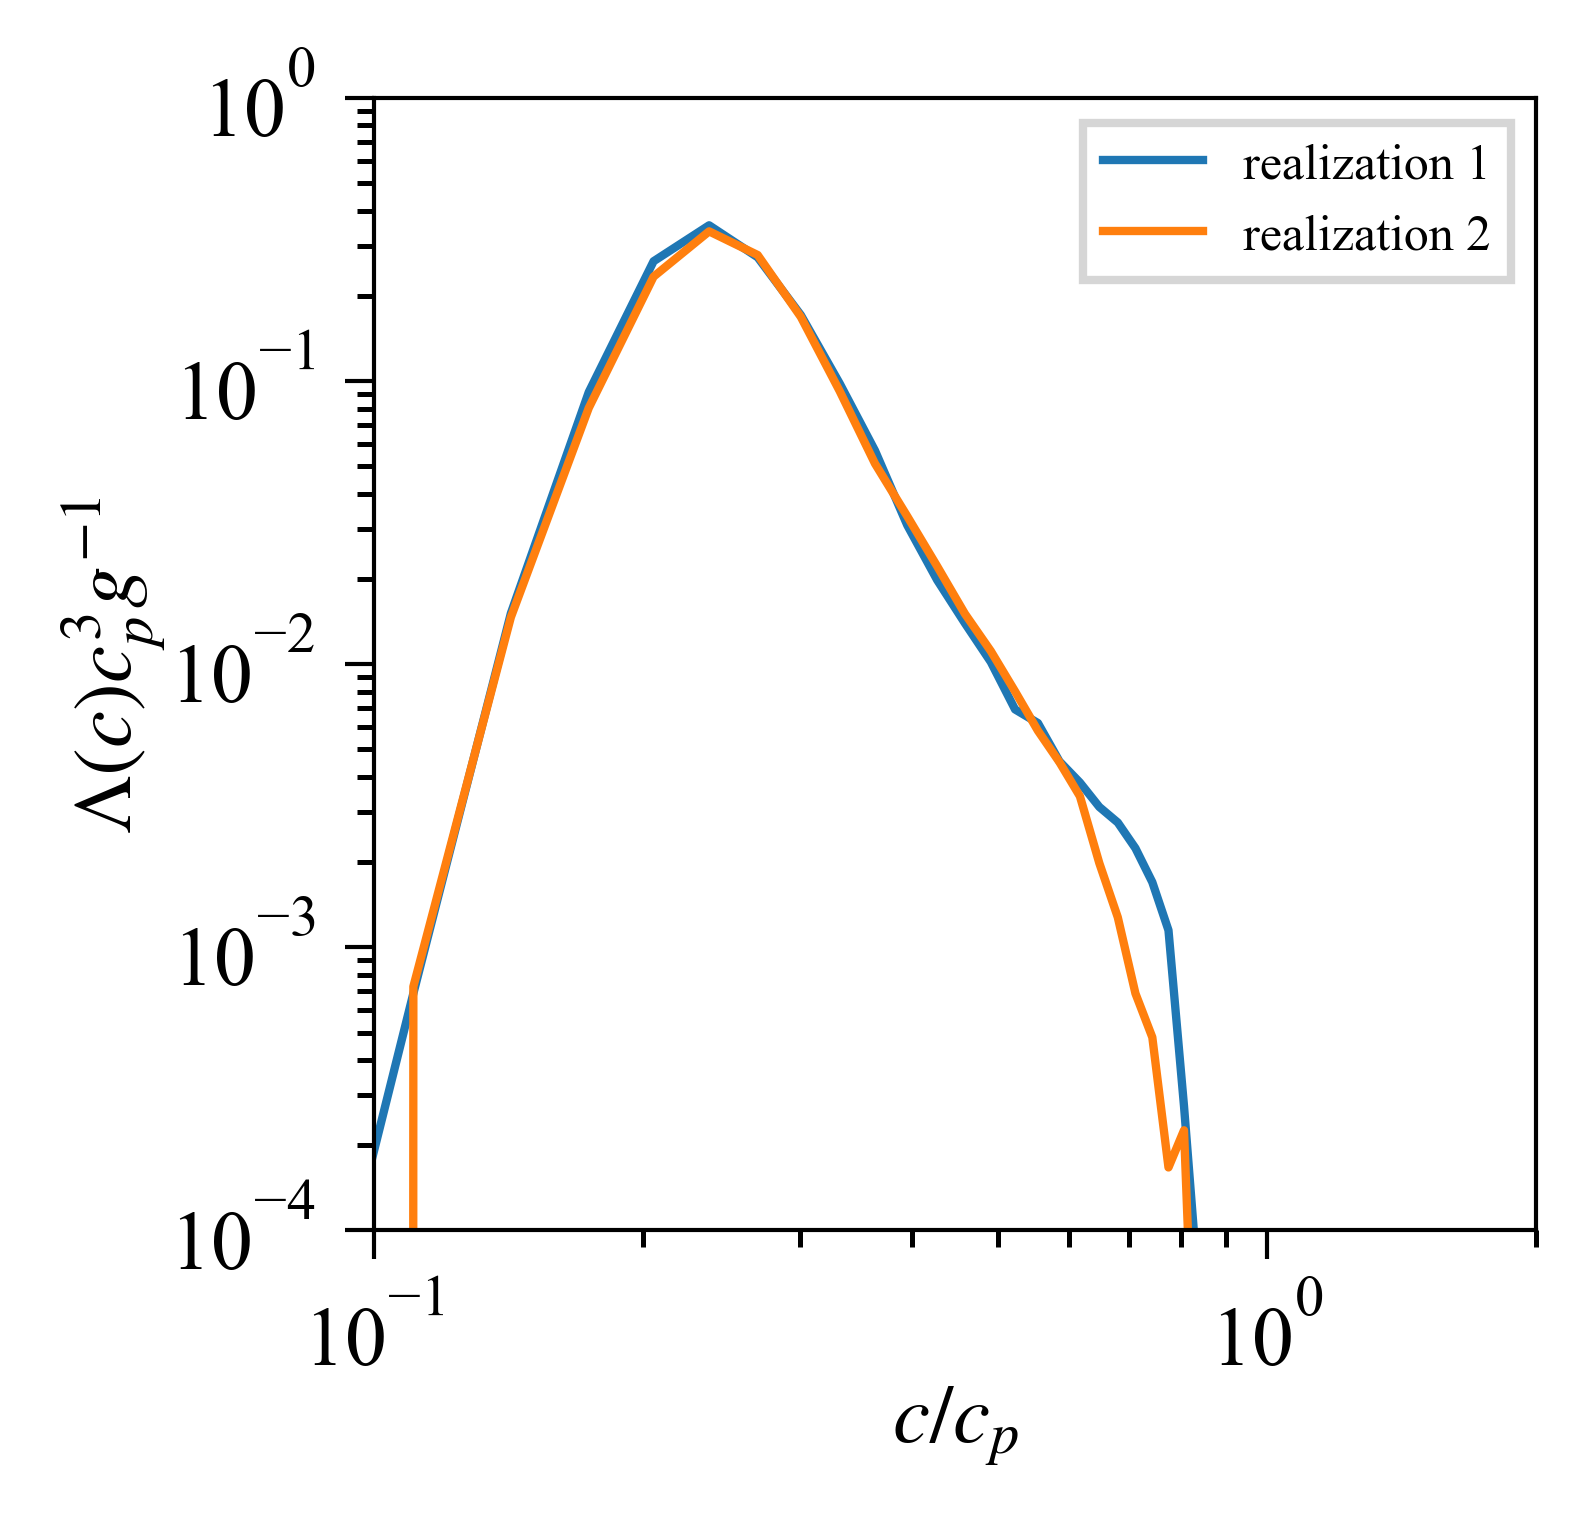

In [83]:

''' Compute the time dependent breaking statistics ''' 

fig = plt.figure(figsize=[2.5,2.5]); ax = plt.gca()

config = config2_2
for k,case in enumerate((config.cases[-1], config.cases[3])):
    normx = (9.8/config.kp)**0.5
    normy = 1/((9.8/config.kp)**1.5/9.8) 
    bins = case.hist_ensem['bins']
    bins_plotting = bins[1:] - (bins[2] - bins[1])/2
    for i,hist in enumerate(case.hist_ensem['hist_ensem']):
        if case.Htheta == 0.503:
            plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                     label='realization %g' %(k+1), linestyle='-', alpha=1, lw=1)            # The extra filter 


plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.1,2])
plt.ylim([10**(-4),10**(0)])
 
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0)
# plt.xlabel(r'$c/((k_pH_s)^{1/2} c_p)$', labelpad=0) # equivalent to plt.xlabel(r'$c/\sqrt{gH_s}$', labelpad=0)
# plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}(k_pH_s)^{-1/2}$', labelpad=0) # equivalent to plt.ylabel(r'$\Lambda(c)\sqrt{gH_s}^3g^{-1}(k_pH_s)^4$', labelpad=0)

plt.legend(fancybox=False, loc='upper right', fontsize=6)
# fig.savefig('figures_revision/criterion.pdf', bbox_inches='tight', pad_inche=0.)
# fig.savefig('figures_nondim/lambda_c_log_Npower.eps', bbox_inches='tight', pad_inche=0.)

### Include Gaussian in the plots

In [120]:
for config in (config_set_Gaussian):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5):
            eta = case.read_t(fieldname='eta', t=110)  
            case.kmod, case.Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
            mu = steepness_trunc (case.Fkmod, case.kmod)
            case.mu_plateau = mu[-1]
            case.Hskp = np.var(eta)**0.5*4*case.config.kp
            config.kmod, config.Fkmod = case.kmod, case.Fkmod
            print(case.config.P, case.Hskp)

N=1024, L=200
0.15 0.23923111545507045
N=1024, L=200
0.15 0.20485497168514183


In [87]:
""" Compute the breaking stats """
tseries_ensem3 = []
tstart = 100
dt = 0.2
tseries = np.arange(tstart, tstart+20, dt)
tseries_ensem3.append(tseries)
""" Compute the breaking stats """
for k, config in enumerate(config_set_Gaussian):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            print(case.path)
            case.time_window(tseries_ensem3, threshold=0, bins=[])

In [103]:
for i, config in enumerate(config_set_Gaussian):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            print(case.path)
            print(case.mu_plateau)
            case.cc = plt.cm.get_cmap('Blues')((case.mu_plateau-0.155)/(0.165-0.155)) # colored by sigma

/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_GaussianG0.15S0.5_RE40000_10_15_rand2_Htheta0.503_new/
0.1625061058573712
/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_GaussianG0.15S0.8_RE40000_10_15_rand2_Htheta0.503_new/
0.16034105731989445


0.005 0.07241790396770004
1.67559293752879
0.008 0.09780394040477139
1.5835629183531257
0.01 0.11444484309374552
1.5138103039876294
0.016 0.14518268462297756
1.46955281512449
0.02 0.15356334172452568
1.5179675311293928
0.05 0.1733031533817428
1.6345785092714238
0.07 0.17649649216435953
1.8002654224091432
0.15 0.1625061058573712
1.4721361649330238
0.15 0.16034105731989445
1.277620187301361


/tmp/ipykernel_164983/1965540713.py:52: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('./figures_revision/spectrum_nondim_Gaussian.pdf', bbox_inches='tight', pad_inche=0.)
/tmp/ipykernel_164983/1965540713.py:53: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('./figures_revision/spectrum_nondim_Gaussian.eps', bbox_inches='tight', pad_inche=0.)


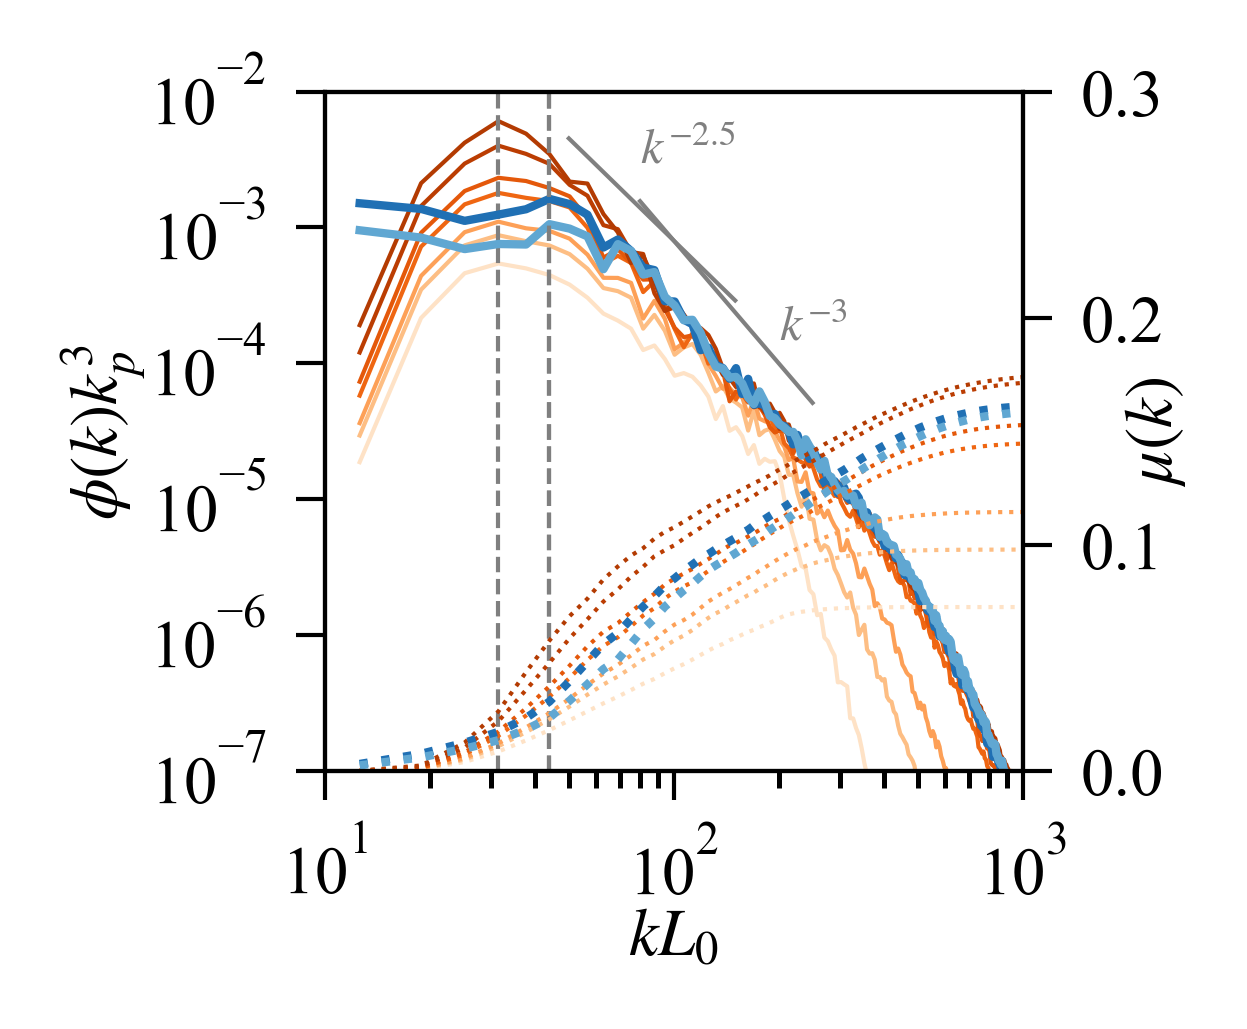

In [146]:
""" FIGURE: 1D spectrum with time """

fig = plt.figure(figsize = [1.5,1.5]); ax = plt.gca()
ax2 = ax.twinx()

for k, config in enumerate(config_set):
    for (j, case) in enumerate(config.cases):
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand == 2):
            mu = steepness_trunc (case.Fkmod, case.kmod)
            ax.plot(case.kmod[2:]*config.L0, case.Fkmod[2:]*config.kp**3, c=case.cc, lw=0.5)
            ax2.plot(case.kmod[2:]*config.L0, mu[2:], ':',  c=case.cc, lw=0.5)
            print(config.P, case.mu_plateau)
            print(case.Hskp/case.mu_plateau)
ax.axvline(2*np.pi/(L/5)*L,ls='--',color='C7',lw=0.5)
            
for k, config in enumerate(config_set_Gaussian):
    for (j, case) in enumerate(config.cases):
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand == 2):
            mu = steepness_trunc (case.Fkmod, case.kmod)
            ax.plot(case.kmod[2:]*config.L0, case.Fkmod[2:]*config.kp**3, c=case.cc, lw=1)
            ax2.plot(case.kmod[2:]*config.L0, mu[2:], ':',  c=case.cc, lw=1)
            imax = np.argmax(case.Fkmod) 
            case.cp_spec = (9.8/case.kmod[imax])**0.5
            ax.axvline(case.kmod[imax]*case.config.L0,ls='--',color='C7',lw=0.5)
            print(config.P, case.mu_plateau)
            print(case.Hskp/case.mu_plateau)

ax.plot(np.arange(50,150,0.05), np.arange(50,150,0.05)**(-2.5)*80, lw=0.5, c='gray')
ax.text(80, 0.003, '$k^{-2.5}$', c='gray', fontsize=6)
ax.plot(np.arange(80,250,0.05), np.arange(80,250,0.05)**(-3.)*800, lw=0.5, c='gray')
ax.text(200, 0.00015, '$k^{-3}$', c='gray', fontsize=6)

ax.set_ylabel('$\phi(k)k_p^3$', labelpad=0, fontsize=8)
ax.set_xlabel('$kL_0$', labelpad=0, fontsize=8)
ax2.set_ylabel('$\mu(k)$', labelpad=-5, fontsize=8)
# ax2.axhline(0.1,ls='--',color='C7',lw=0.5)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax.legend(loc='lower left', fancybox=False, bbox_to_anchor=(1.4, 0.2), handlelength=0.8)

ax.set_xscale('log')
ax.set_yscale('log')
# Limit of resolution
N = 512; L = 200; kp = 2*np.pi/(L/5); omegap = (9.8*kp)**0.5
k_m = 2*np.pi/(L/512*4)
ax.set_xlim([10,k_m*L])
ax.set_xlim([10,1000])
ax.set_ylim([10**(-7.),10**(-2.)])
ax2.set_ylim([0,0.3])
ax.set_yticks([10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2)])
ax.xaxis.set_tick_params(labelsize=8); ax.yaxis.set_tick_params(labelsize=8); ax2.yaxis.set_tick_params(labelsize=8)

fig.savefig('./figures_revision/spectrum_nondim_Gaussian.pdf', bbox_inches='tight', pad_inche=0.)
fig.savefig('./figures_revision/spectrum_nondim_Gaussian.eps', bbox_inches='tight', pad_inche=0.)

/tmp/ipykernel_164983/1084055744.py:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/correlation_Gaussian.eps', bbox_inches='tight', pad_inche=0.)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/tmp/ipykernel_164983/1084055744.py:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/correlation_Gaussian.pdf', bbox_inches='tight', pad_inche=0.)


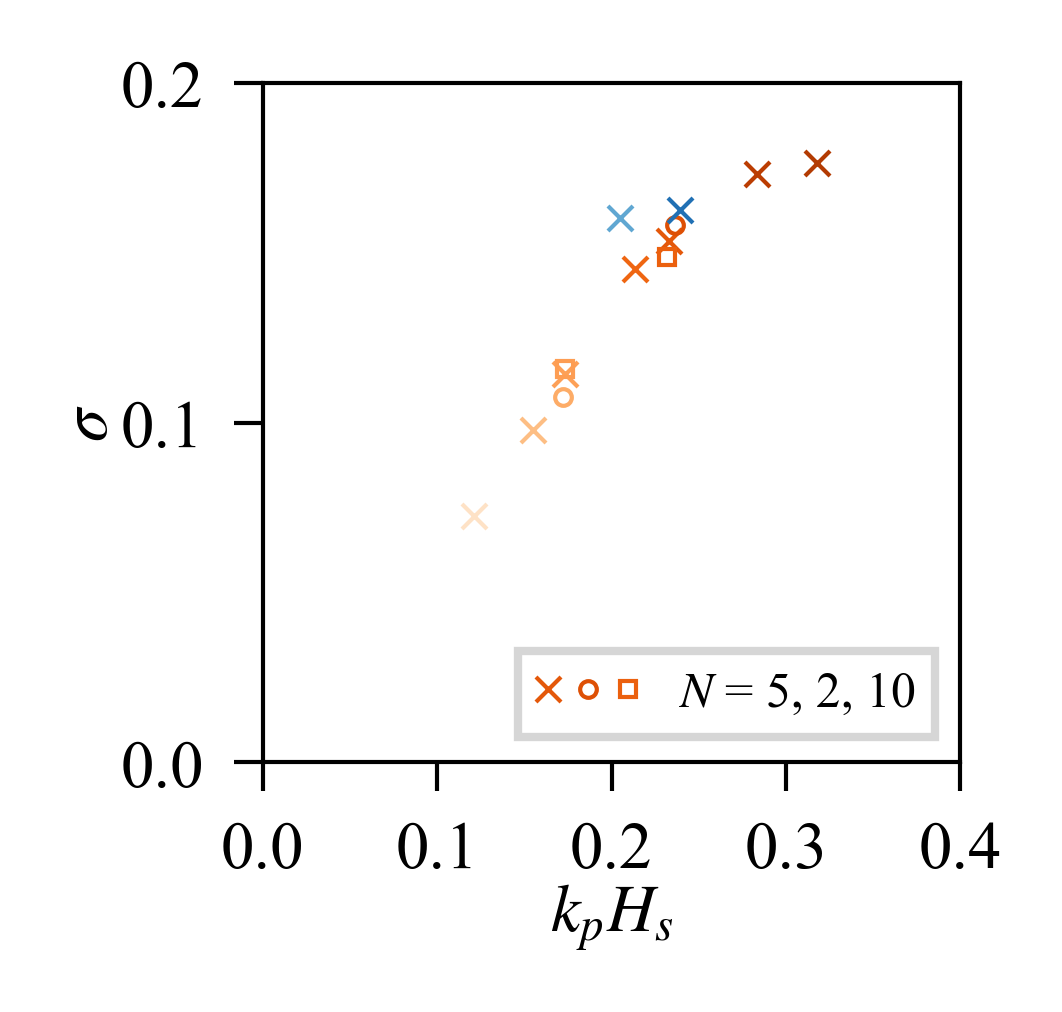

In [147]:
""" Is Hskp and MSS correlated? """
from matplotlib.legend_handler import HandlerTuple
fig = plt.figure(figsize=[1.5,1.5]); ax = plt.gca()

""" Sieve out the different slope limiter cases """
for config in (config_set):
    for case in config.cases:
        case.SLOPE = True
            
config2_3.cases[2].SLOPE = False # different slope limiter

for (i,config) in enumerate(config_set):
    if i == 4:
        for (j,case) in enumerate(config.cases):
            if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 2) and (case.rand == 2):
                d2, = plt.plot(case.Hskp, case.mu_plateau, 'o', c=case.cc, markersize=2, markerfacecolor='None', markeredgewidth=0.5, label = r'$N=2$')
            if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand == 2):
#             if (case.NL == 15) and (case.LEVEL == 9) and (case.SLOPE) and (case.rand != 0) and (case.rand != 1):
                d1, = plt.plot(case.Hskp, case.mu_plateau, 'x', c=case.cc, markersize=3,  markeredgewidth=0.5, label = r'$N=5$')
            if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 10) and (case.rand == 2):
                d3, = plt.plot(case.Hskp, case.mu_plateau, 's', c=case.cc, markersize=2, markerfacecolor='None', markeredgewidth=0.5, label = r'$N=10$')
    else:
        for (j,case) in enumerate(config.cases):
            if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand == 2):
                plt.plot(case.Hskp, case.mu_plateau, 'x', c=case.cc, markersize=3,  markeredgewidth=0.5)
            if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 2) and (case.rand == 2):
                plt.plot(case.Hskp, case.mu_plateau, 'o', c=case.cc, markersize=2, markerfacecolor='None', markeredgewidth=0.5)
            if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 10) and (case.rand == 2):
                plt.plot(case.Hskp, case.mu_plateau, 's', c=case.cc, markersize=2, markerfacecolor='None', markeredgewidth=0.5)
                
for k, config in enumerate(config_set_Gaussian):
    for (j, case) in enumerate(config.cases):
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand == 2):
            plt.plot(case.Hskp, case.mu_plateau, 'x', c=case.cc, markersize=3,  markeredgewidth=0.5)
                
plt.xlim([0.,0.4]); plt.xticks(np.array([0, 0.1,0.2,0.3,0.4]))
plt.ylim([0.,0.2]); plt.yticks(np.array([0., 0.1, 0.2]))
plt.xlabel(r'$k_pH_s$', labelpad=0, fontsize=8); plt.ylabel(r'$\sigma$', labelpad=0, fontsize=8)
legend = plt.legend([(d1,d2,d3)], [r'$N$ = 5, 2, 10'], handler_map={tuple: HandlerTuple(ndivide=None)}, loc='lower right', fancybox=False, fontsize=6, handlelength=2)

ax.xaxis.set_tick_params(labelsize=8); ax.yaxis.set_tick_params(labelsize=8)

fig.savefig('figures_revision/correlation_Gaussian.eps', bbox_inches='tight', pad_inche=0.)
fig.savefig('figures_revision/correlation_Gaussian.pdf', bbox_inches='tight', pad_inche=0.)

/tmp/ipykernel_164983/1099523474.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/lambda_c_log_Npower_alter_Gaussian.pdf', bbox_inches='tight', pad_inche=0.)
/tmp/ipykernel_164983/1099523474.py:47: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/lambda_c_log_Npower_alter_Gaussian.eps', bbox_inches='tight', pad_inche=0.)


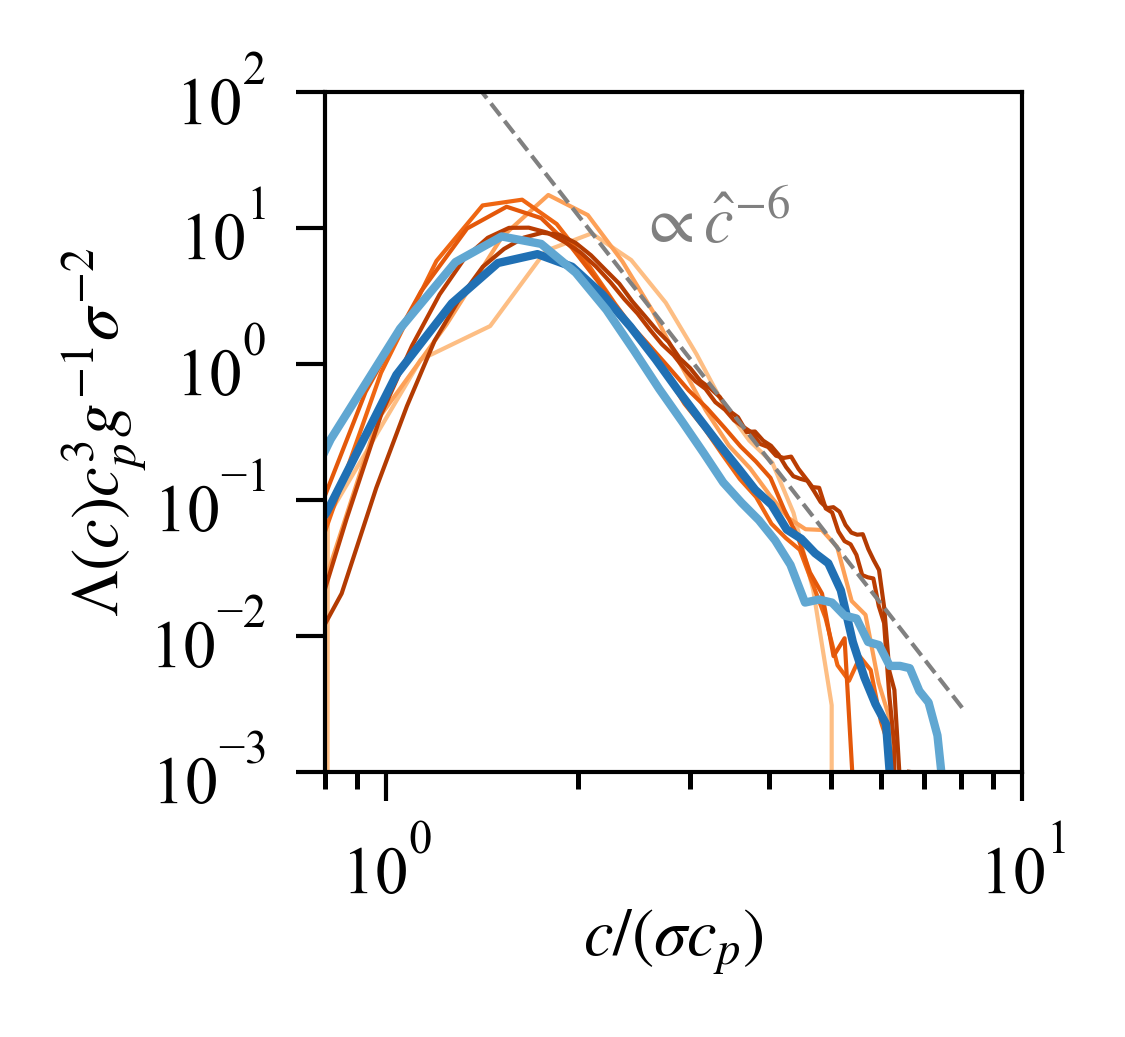

In [148]:
""" Normalized Lambda(x) distribution. Also include different lines for different angle spread. """
fig = plt.figure(figsize=[1.5,1.5]); ax = plt.gca()

for k, config in enumerate(config_set[1:]):
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand == 2):
            normx = (9.8/config.kp)**0.5 * case.mu_plateau ** 1
            normy = 1/((9.8/config.kp)**1.5/9.8) * case.mu_plateau ** 2
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=config.P, c=case.cc, linestyle='-', alpha=1, lw=0.5)            # The extra filter 

for k, config in enumerate(config_set_Gaussian):
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand == 2):
            normx = case.cp_spec * case.mu_plateau ** 1
            normy = 1/(case.cp_spec**3/9.8) * case.mu_plateau ** 2
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=config.P, c=case.cc, linestyle='-', alpha=1, lw=1)            # The extra filter 

plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.8,10])
plt.ylim([10**(-3),10**2])
 
plt.xlabel(r'$c/(\sigma c_p)$', labelpad=0, fontsize=8)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}\sigma^{-2}$', labelpad=0., fontsize=8)
ax.set_yticks([10**(-3), 10**(-2), 10**(-1), 10**(0), 10**(1), 10**2])
# plt.xlabel(r'$c/((k_pH_s)^{1/2} c_p)$', labelpad=0) # equivalent to plt.xlabel(r'$c/\sqrt{gH_s}$', labelpad=0)
# plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}(k_pH_s)^{-1/2}$', labelpad=0) # equivalent to plt.ylabel(r'$\Lambda(c)\sqrt{gH_s}^3g^{-1}(k_pH_s)^4$', labelpad=0)

""" Normalized """
x_ = np.linspace(0.5, 8.1, 100)
y_ = x_**(-6)*800
plt.plot(x_, y_, '--', c='gray', alpha=1, lw=0.5)
ax.annotate(r'$\propto\hat{c}^{-6}$', xy=(0.45, 0.85), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=8)
ax.xaxis.set_tick_params(labelsize=8); ax.yaxis.set_tick_params(labelsize=8)

fig.savefig('figures_revision/lambda_c_log_Npower_alter_Gaussian.pdf', bbox_inches='tight', pad_inche=0.)
fig.savefig('figures_revision/lambda_c_log_Npower_alter_Gaussian.eps', bbox_inches='tight', pad_inche=0.)